Sumber Data : https://www.kaggle.com/datasets/sinderpreet/analyze-the-marketing-spending

Analyze the marketing spending.

1. Overall ROMI
2. ROMI by campaigns
3. Performance of the campaign depending on the date - on which date did we spend the most money on advertising, when we got the biggest revenue when conversion rates were high and low? What were the average order values?
4. When buyers are more active? What is the average revenue on weekdays and weekends?
5. Which types of campaigns work best - social, banner, influencer, or a search?
6. Which geo locations are better for targeting - tier 1 or tier 2 cities?

Column. Description
1. Date date of spending of the marketing budget
2. Campaign name description of campaign
3. Category type of marketing source
4. Campaign id unique identifier
5. Impressions number of times the ad has been shown
6. Mark. budget money spent on this campaign on this day
7. Clicks how many people clicked on a banner (=visited website)
8. Leads how many people signed up and left their credentials
9. Orders how many people paid for the product
10. Revenue how much money we earned

Clicks, Leads, orders, and revenue are calculated for a specific marketing campaign on a specific date. E.g. For the “facebook_tier1” marketing campaign on the 1st of February, we spent INR 7,307.37, got 148,263 impressions that converted to 1,210 clicks that in turn converted to 13 leads and 1 order. We earned INR 4,981.

This data reflects some facts about what happened - how much we spent, how much we earned, how customers behaved (who clicked on the ad banner, who signed up, who paid). Now we need to calculate marketing metrics that would help us evaluate if we did a good job or not and also identify some parameters of the campaign that would be important for analysis.
What are these metrics:

Return on marketing investment (ROMI)
Cost per click (CPC)
Cost per lead (CPL)
Customer acquisition cost (CAC)
Average order value (AOV)
Conversion rate 1
Conversion rate 2
These metrics are actionable and allow us not only to analyze but to make decisions and act to improve the business result.

Let’s dive deeper.

ROMI return on marketing investments, how effective is marketing
campaign, one metric that shows effectiveness of every rupee spent.
It is calculated ( Total earning (Revenue) - Marketing cost ) / Marketing cost )

Click-through rate(CTR). percentage of people who clicked at banner (Clicks/ Impressions)

Conversion 1 conversion from visitors to leads for this campaign (Leads/Click)

Conversion 2 conversion rate from leads to sales (Orders/Leads)

Average order value (AOV) Average order value for this campaign (Revenue/Number of Orders)

Cost per click (CPC) how much does it cost us to attract 1 click (on average)
(Marketing spending/Clicks)

Cost per lead (CPL) how much does it cost us to attract 1 lead (on average)
(Marketing spending/Leads)

Customer acquisition cost (CAC) -- how much does it cost us to attract 1 order (on average)
(marketing spend/ orders)
Gross profit Profit or loss after deducting marketing cost (Revenue-Marketing spending)

ROMI is the most important metric and it is used as the ultimate way to evaluate if the campaign is good or bad.

You can use this article to know more about marketing metrics.
https://www.owox.com/blog/articles/digital-marketing-metrics-and-kpis/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("C:/Users/User/Documents/Rull/Python learn/digital marketing/Marketing.csv")

# DATA EXPLORATION

In [4]:
df.head()

,id,c_date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue
0,1,2021-02-01,facebook_tier1,social,349043,148263,7307.37,1210,13,1,4981.0
1,2,2021-02-01,facebOOK_tier2,social,348934,220688,16300.20,1640,48,3,14962.0
2,3,2021-02-01,google_hot,search,89459845,22850,5221.60,457,9,1,7981.0
3,4,2021-02-01,google_wide,search,127823,147038,6037.00,1196,24,1,2114.0
4,5,2021-02-01,youtube_blogger,influencer,10934,225800,29962.20,2258,49,10,84490.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             308 non-null    int64  
 1   c_date         308 non-null    object 
 2   campaign_name  308 non-null    object 
 3   category       308 non-null    object 
 4   campaign_id    308 non-null    int64  
 5   impressions    308 non-null    int64  
 6   mark_spent     308 non-null    float64
 7   clicks         308 non-null    int64  
 8   leads          308 non-null    int64  
 9   orders         308 non-null    int64  
 10  revenue        308 non-null    float64
dtypes: float64(2), int64(6), object(3)
memory usage: 26.6+ KB


## Rubah Tipe Data

In [6]:
df['c_date'] = pd.to_datetime(df['c_date'])
df['campaign_id'] = df['campaign_id'].astype(object)
df['id'] = df['id'].astype(object)

In [7]:
df['campaign_name'] = df['campaign_name'].str.lower()

## Cek Outlier

### Boxplot

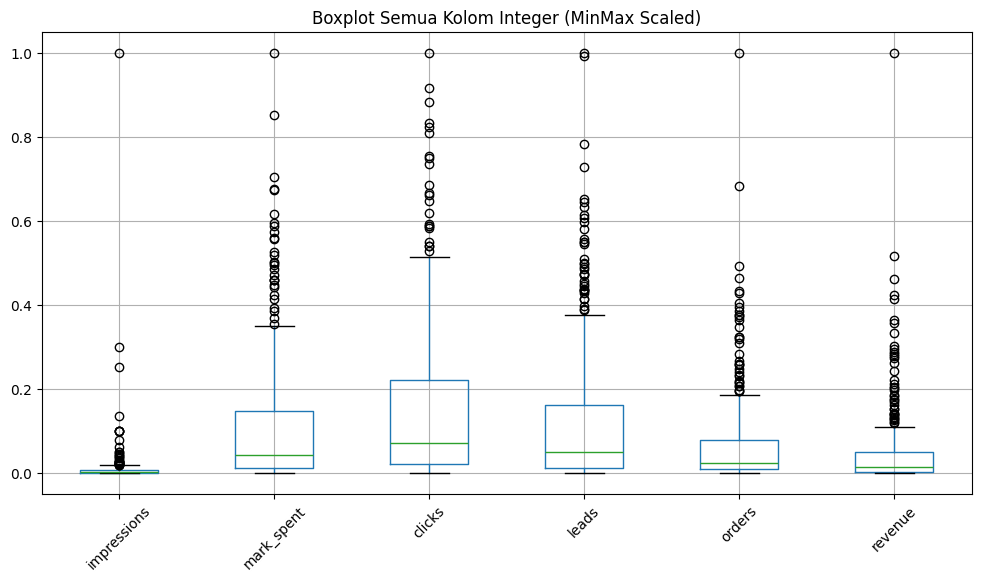

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Ambil semua kolom bertipe integer
int_cols = df.select_dtypes(include=['int', 'float']).columns

# Scaling dengan MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[int_cols] = scaler.fit_transform(df[int_cols])

# Boxplot setelah scaling
plt.figure(figsize=(12, 6))
df_scaled[int_cols].boxplot()
plt.title('Boxplot Semua Kolom Integer (MinMax Scaled)')
plt.xticks(rotation=45)
plt.show()

### Boxplot dan Histogram

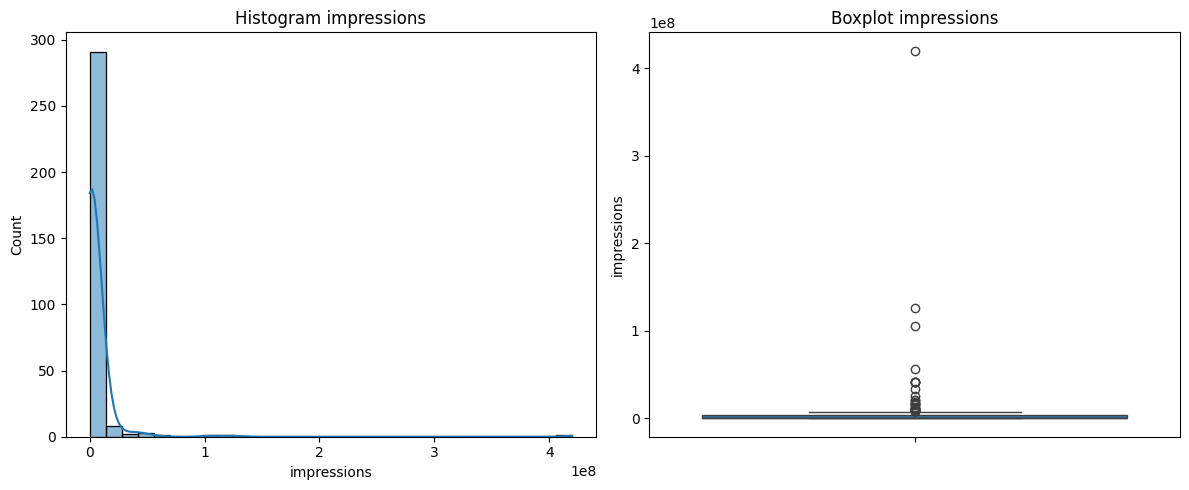

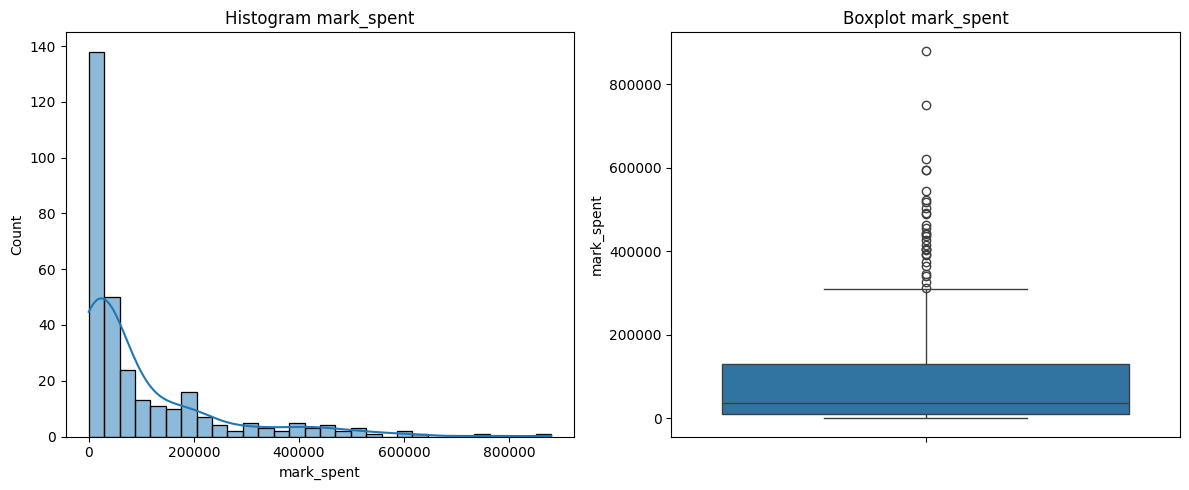

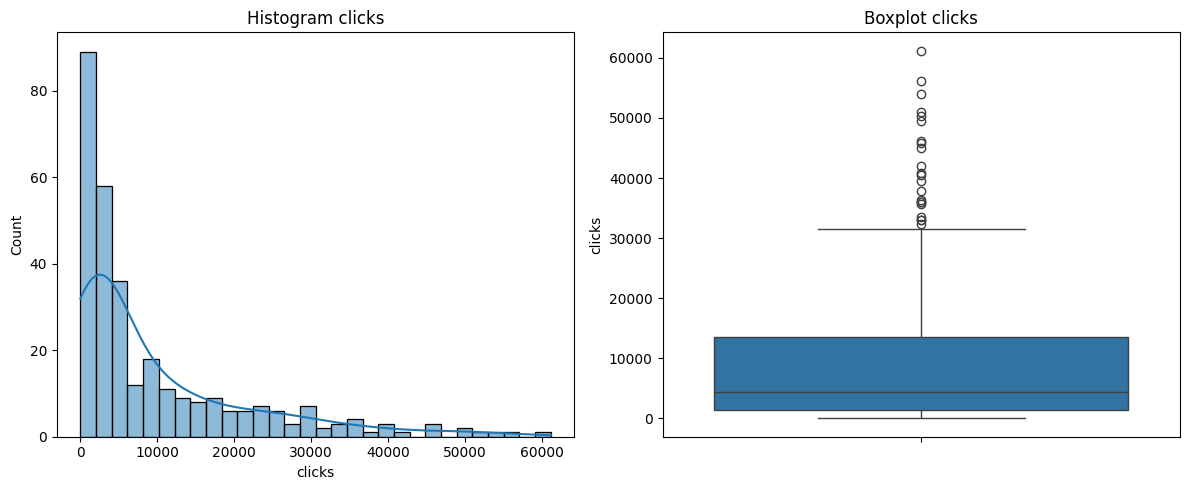

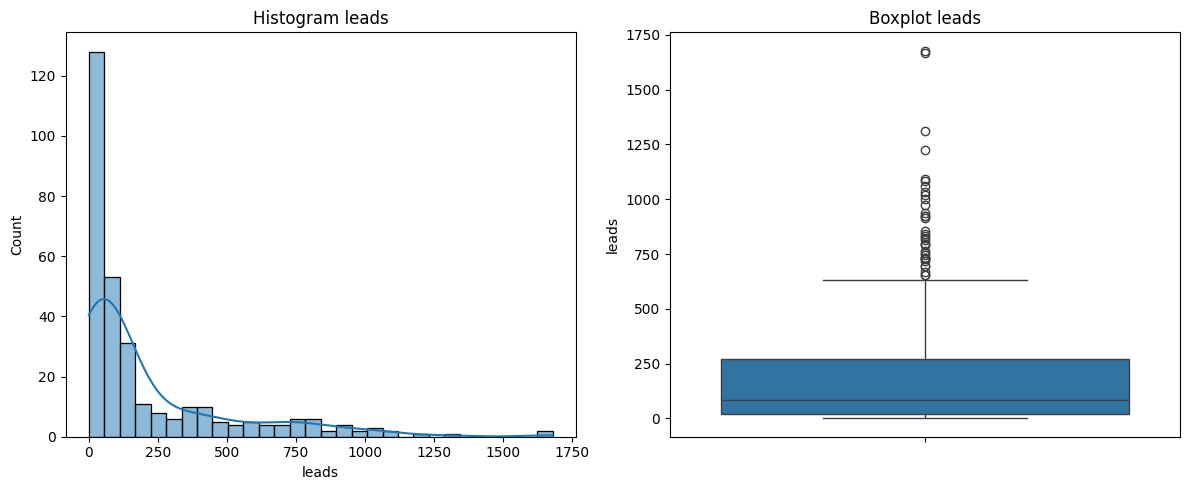

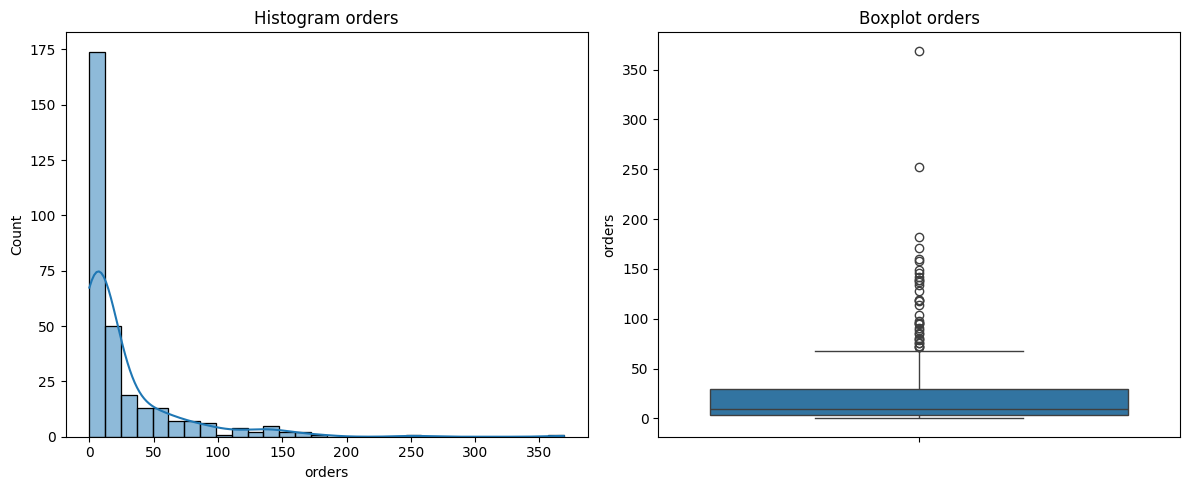

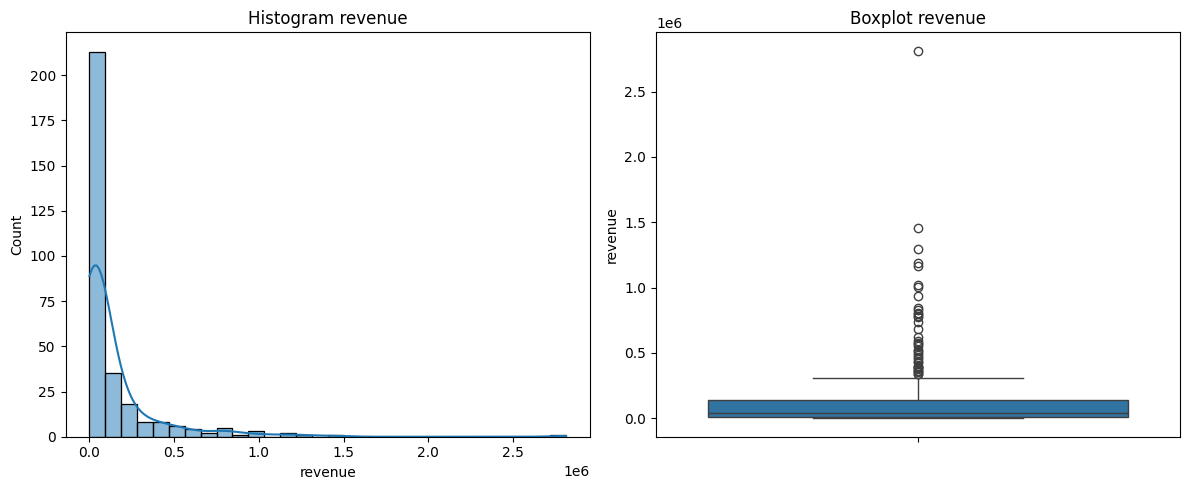

In [9]:
col = int_cols # ganti dengan nama kolom yang diinginkan

for col in int_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram
    sns.histplot(df[col], bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram {col}')

    # Boxplot
    sns.boxplot(y=df[col], ax=axes[1])
    axes[1].set_title(f'Boxplot {col}')

    plt.tight_layout()

Dari Histogram diatas bisa dilihat bahwa semua kolom data memiliki distribusi yang miring kanan, atau data yang bertumpuk di sebelah kiri. Ini menunjukan bahwa setiap kolom cenderung memiliki nilai data yang rendah dan ada beberapa (sangat sdikit) yang memiliki nilai yang sangat tinggi. Sebagai contoh jika kita ambil kolom revenue, maka revenue yang didaptkan cenderung rendah dari campaign yang dilakukan selama periode bulan Februari 2021.

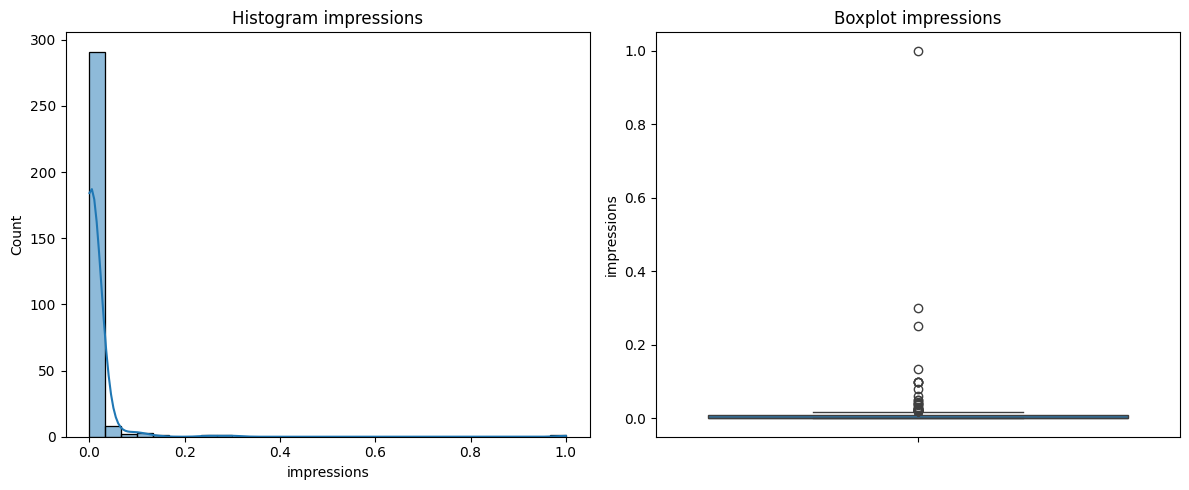

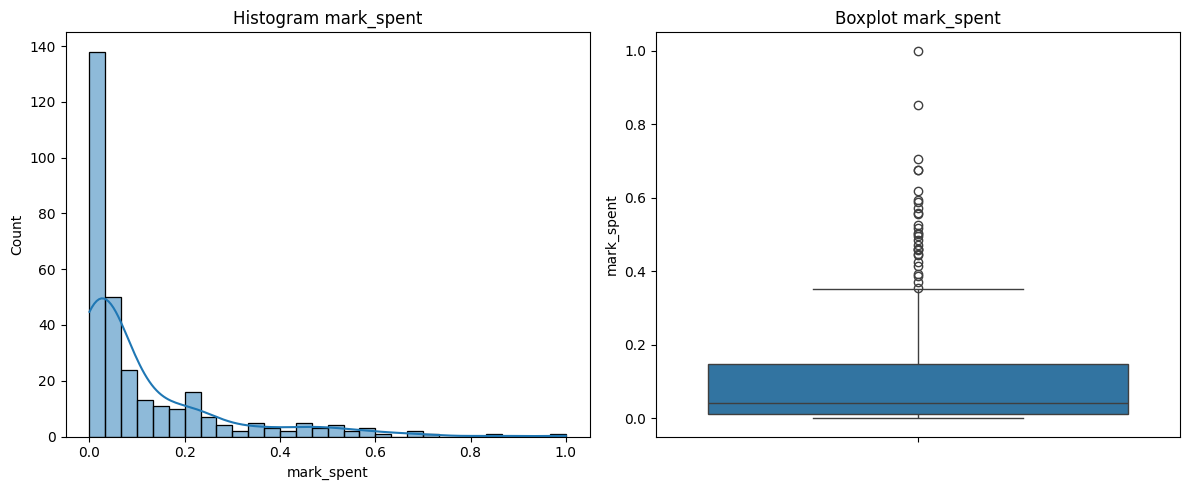

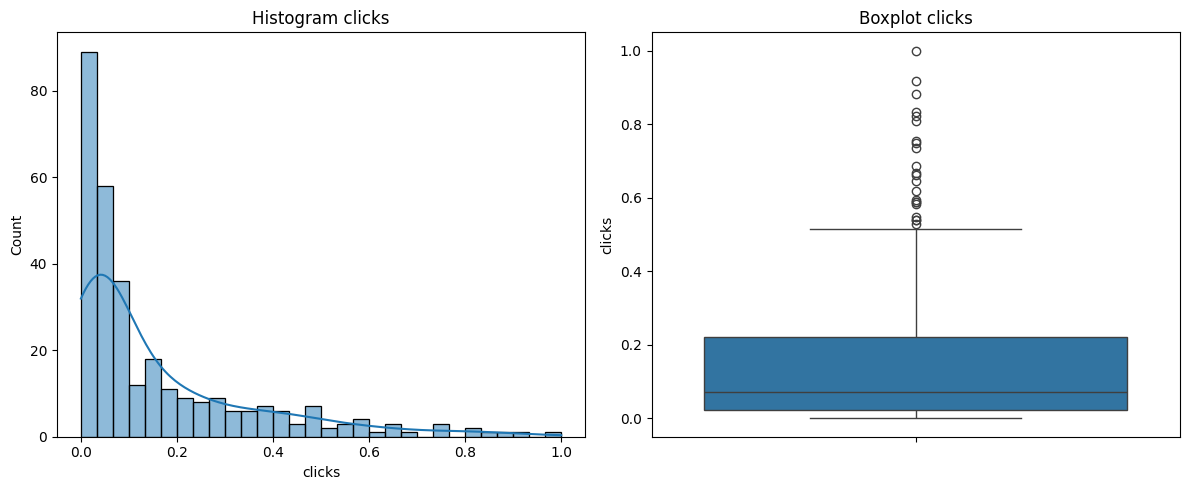

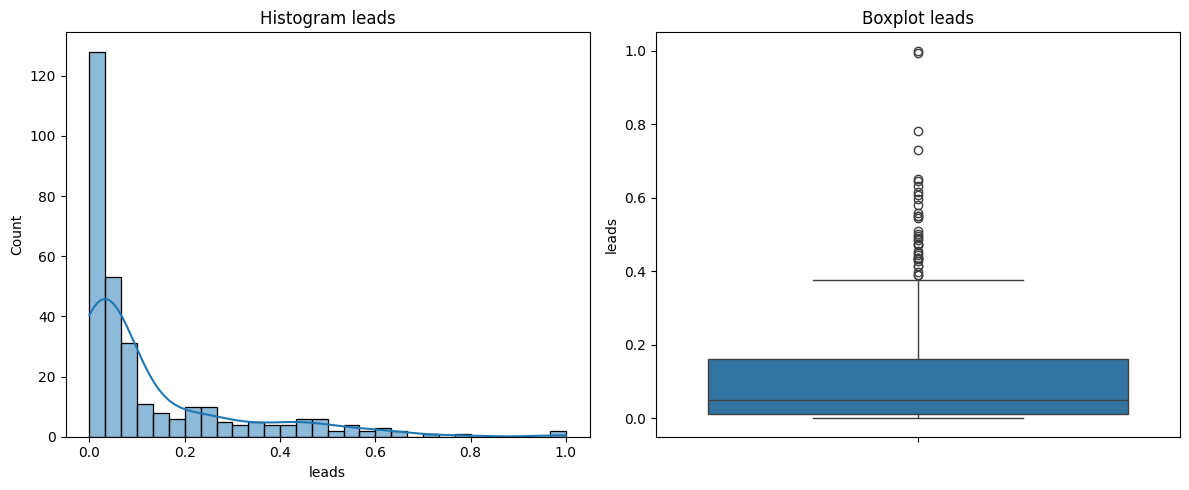

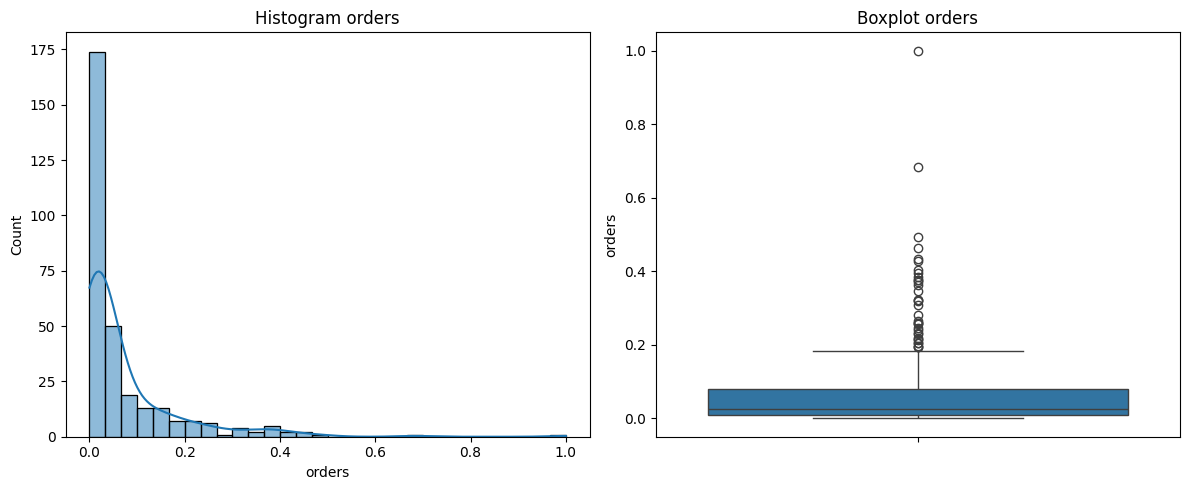

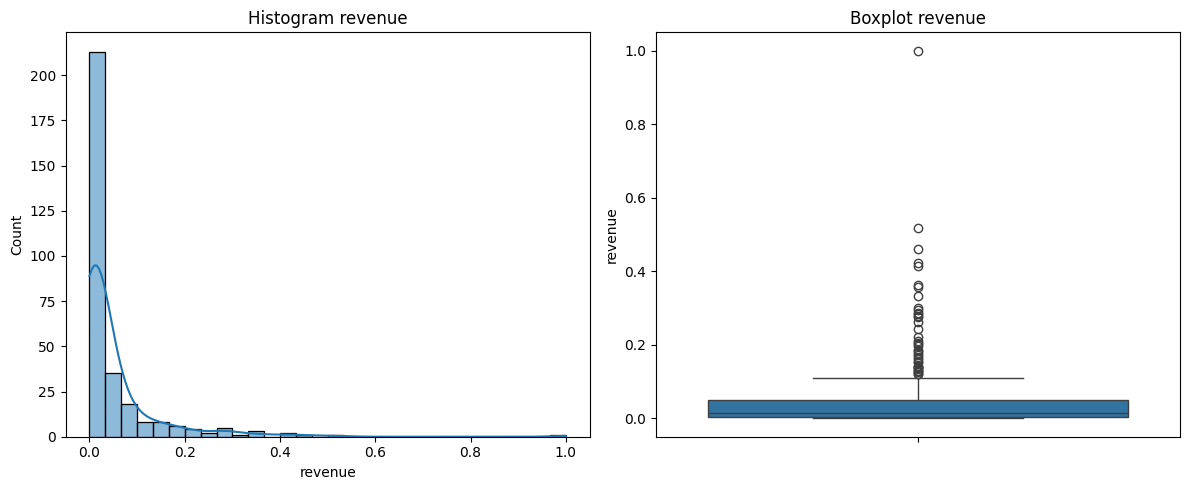

In [10]:
col = int_cols # ganti dengan nama kolom yang diinginkan

for col in int_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram
    sns.histplot(df_scaled[col], bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram {col}')

    # Boxplot
    sns.boxplot(y=df_scaled[col], ax=axes[1])
    axes[1].set_title(f'Boxplot {col}')

    plt.tight_layout()

In [11]:
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_dict = {}  # Dictionary untuk menyimpan outlier tiap kolom

for col in int_cols:
    outlier_impression, lower_bound, upper_bound = find_outliers_iqr(df, col)
    outlier_dict[col] = outlier_impression  # Simpan DataFrame outlier per kolom
    print(f"Jumlah outlier pada kolom {col}: {outlier_impression.shape[0]/df.shape[0] * 100:.2f}%")
# Contoh akses outlier pada kolom tertentu:
# outlier_dict['impressions']

Jumlah outlier pada kolom impressions: 10.06%
Jumlah outlier pada kolom mark_spent: 9.42%
Jumlah outlier pada kolom clicks: 7.14%
Jumlah outlier pada kolom leads: 11.69%
Jumlah outlier pada kolom orders: 11.36%
Jumlah outlier pada kolom revenue: 12.66%


Persentase Outlier ini bisa diartikan sebagai data yang memiliki nilai yang jauh dari kebanyakan data. Karena berdasarkan histogram mayoritas data berada pada nilai yang rendah, berarti outlier ini kebanyakan merupakan data yang memiliki nilai yang sangat tinggi.

## Korelasi Data

### Heatmap

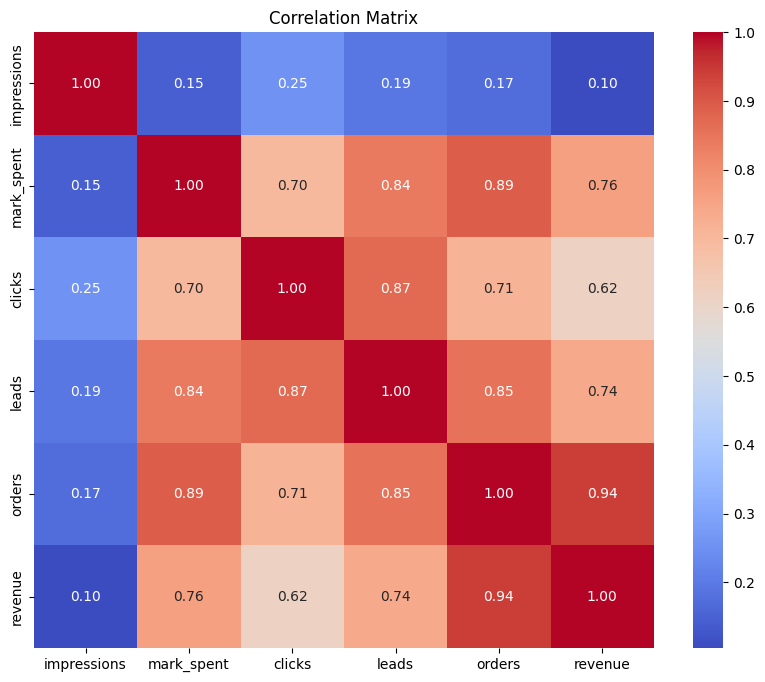

In [12]:
# Melihat korelasi antar variabel numerik
corr_matrix = df[int_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Semua variabel memiliki korelasi yang positif, dan hanya impression yang tidak berkorelasi secara signifikan dengan variabel lain, ini ditandai dengan nilainya yang sangat rendah. Hal ini menunjukan bahwa jika satu variabel mengalami kenaikan maka variabel lain juga akan mengalami kenaikan.

### Scatter Plot

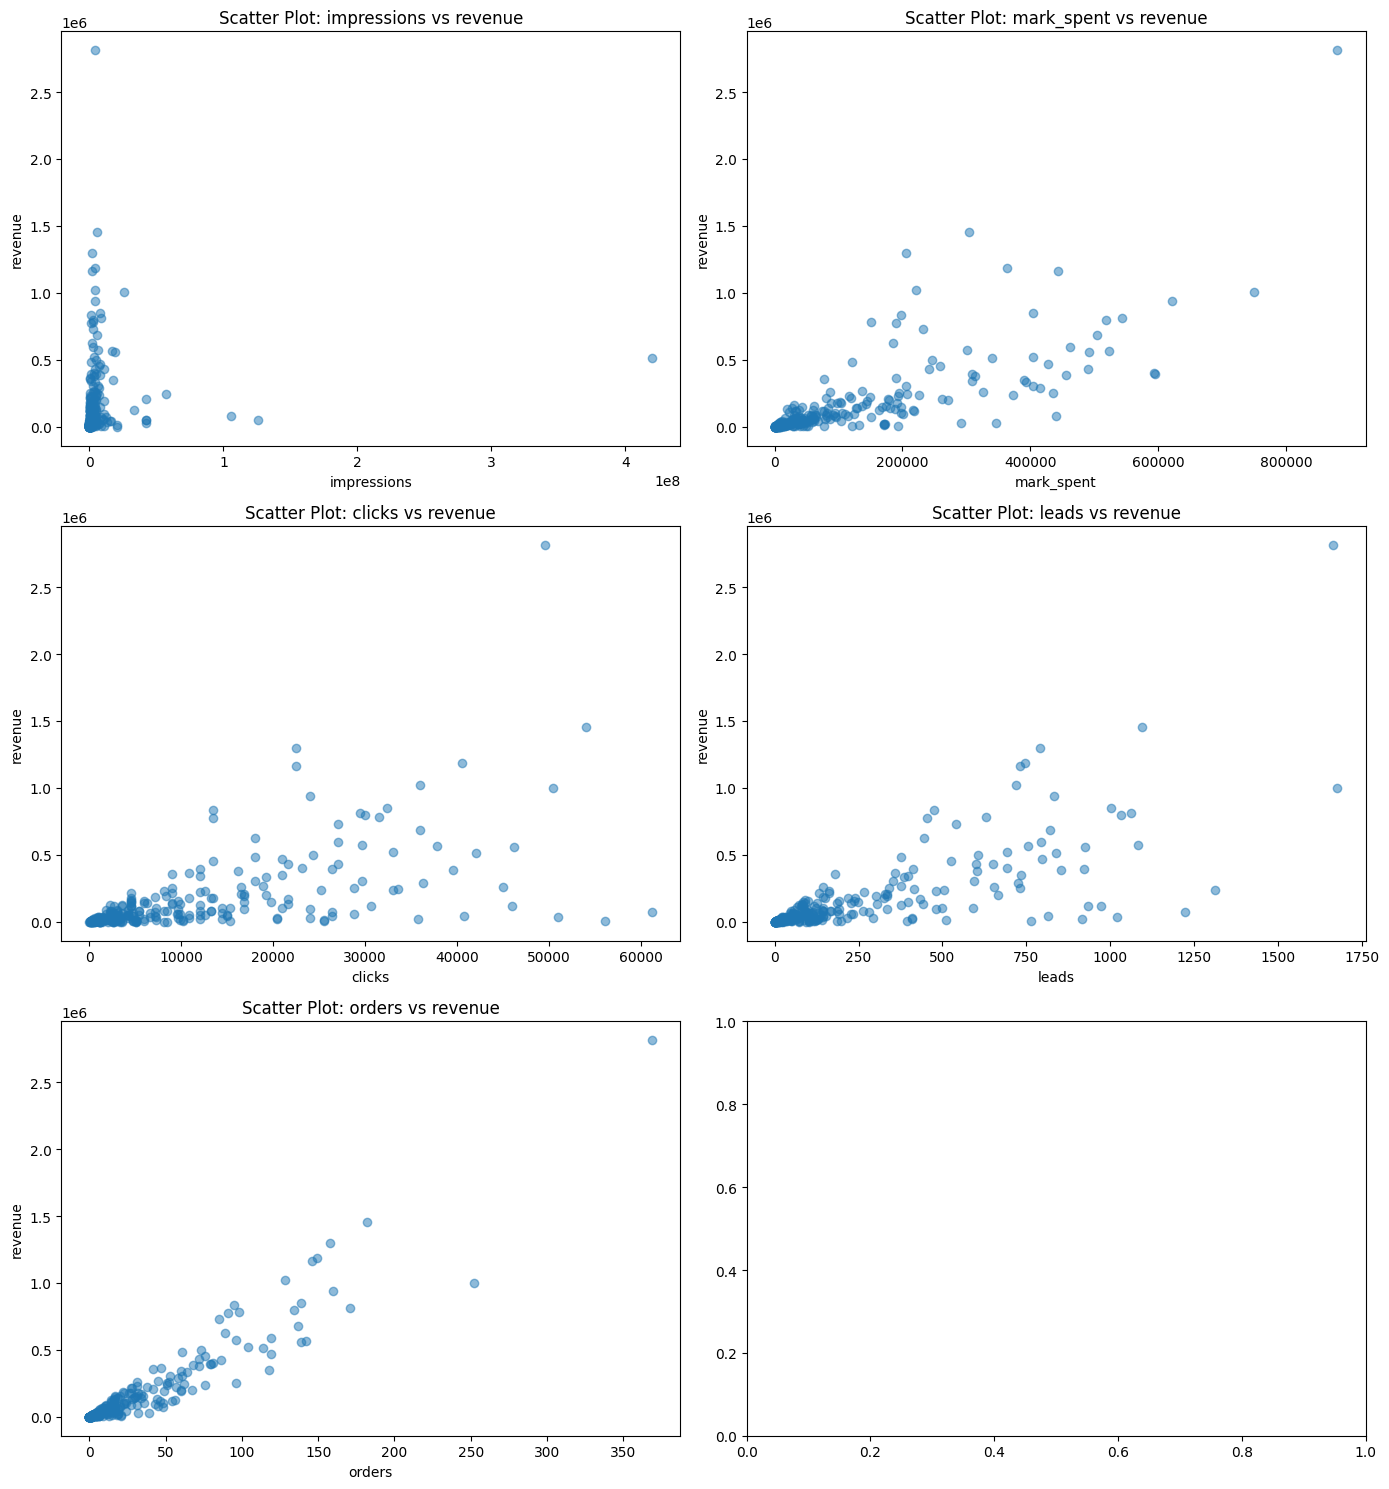

In [13]:
# Scatter plot setiap kolom integer terhadap satu target, misal 'revenue', dalam subplot 3x2
target_col = 'revenue'  # ganti dengan kolom target yang diinginkan
cols_to_plot = [col for col in int_cols if col != target_col][:5]  # ambil 6 kolom pertama selain target

fig, axes = plt.subplots(3, 2, figsize=(14, 15))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    axes[i].scatter(df[col], df[target_col], alpha=0.5)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target_col)
    axes[i].set_title(f'Scatter Plot: {col} vs {target_col}')

plt.tight_layout()

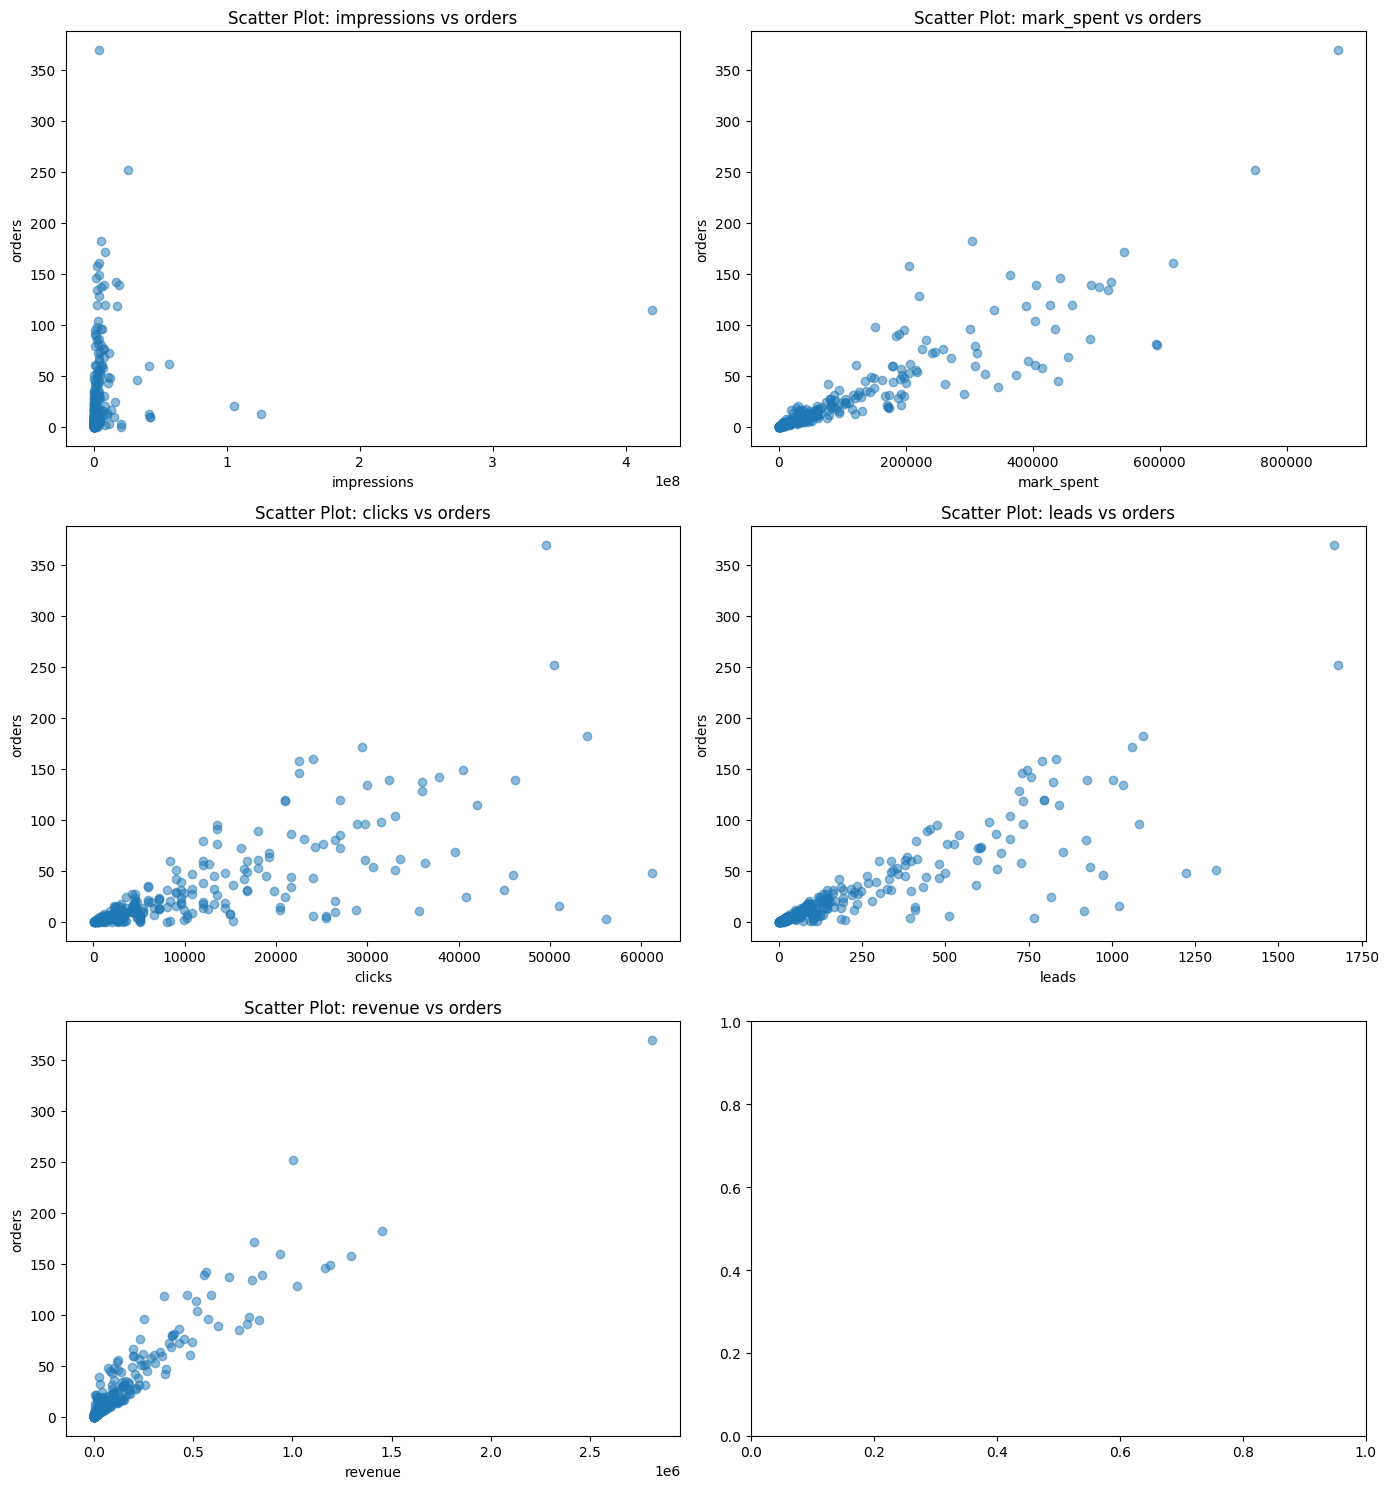

In [14]:
# Scatter plot setiap kolom integer terhadap satu target, misal 'revenue', dalam subplot 3x2
target_col = 'orders'  # ganti dengan kolom target yang diinginkan
cols_to_plot = [col for col in int_cols if col != target_col][:5]  # ambil 6 kolom pertama selain target

fig, axes = plt.subplots(3, 2, figsize=(14, 15))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    axes[i].scatter(df[col], df[target_col], alpha=0.5)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target_col)
    axes[i].set_title(f'Scatter Plot: {col} vs {target_col}')

plt.tight_layout()

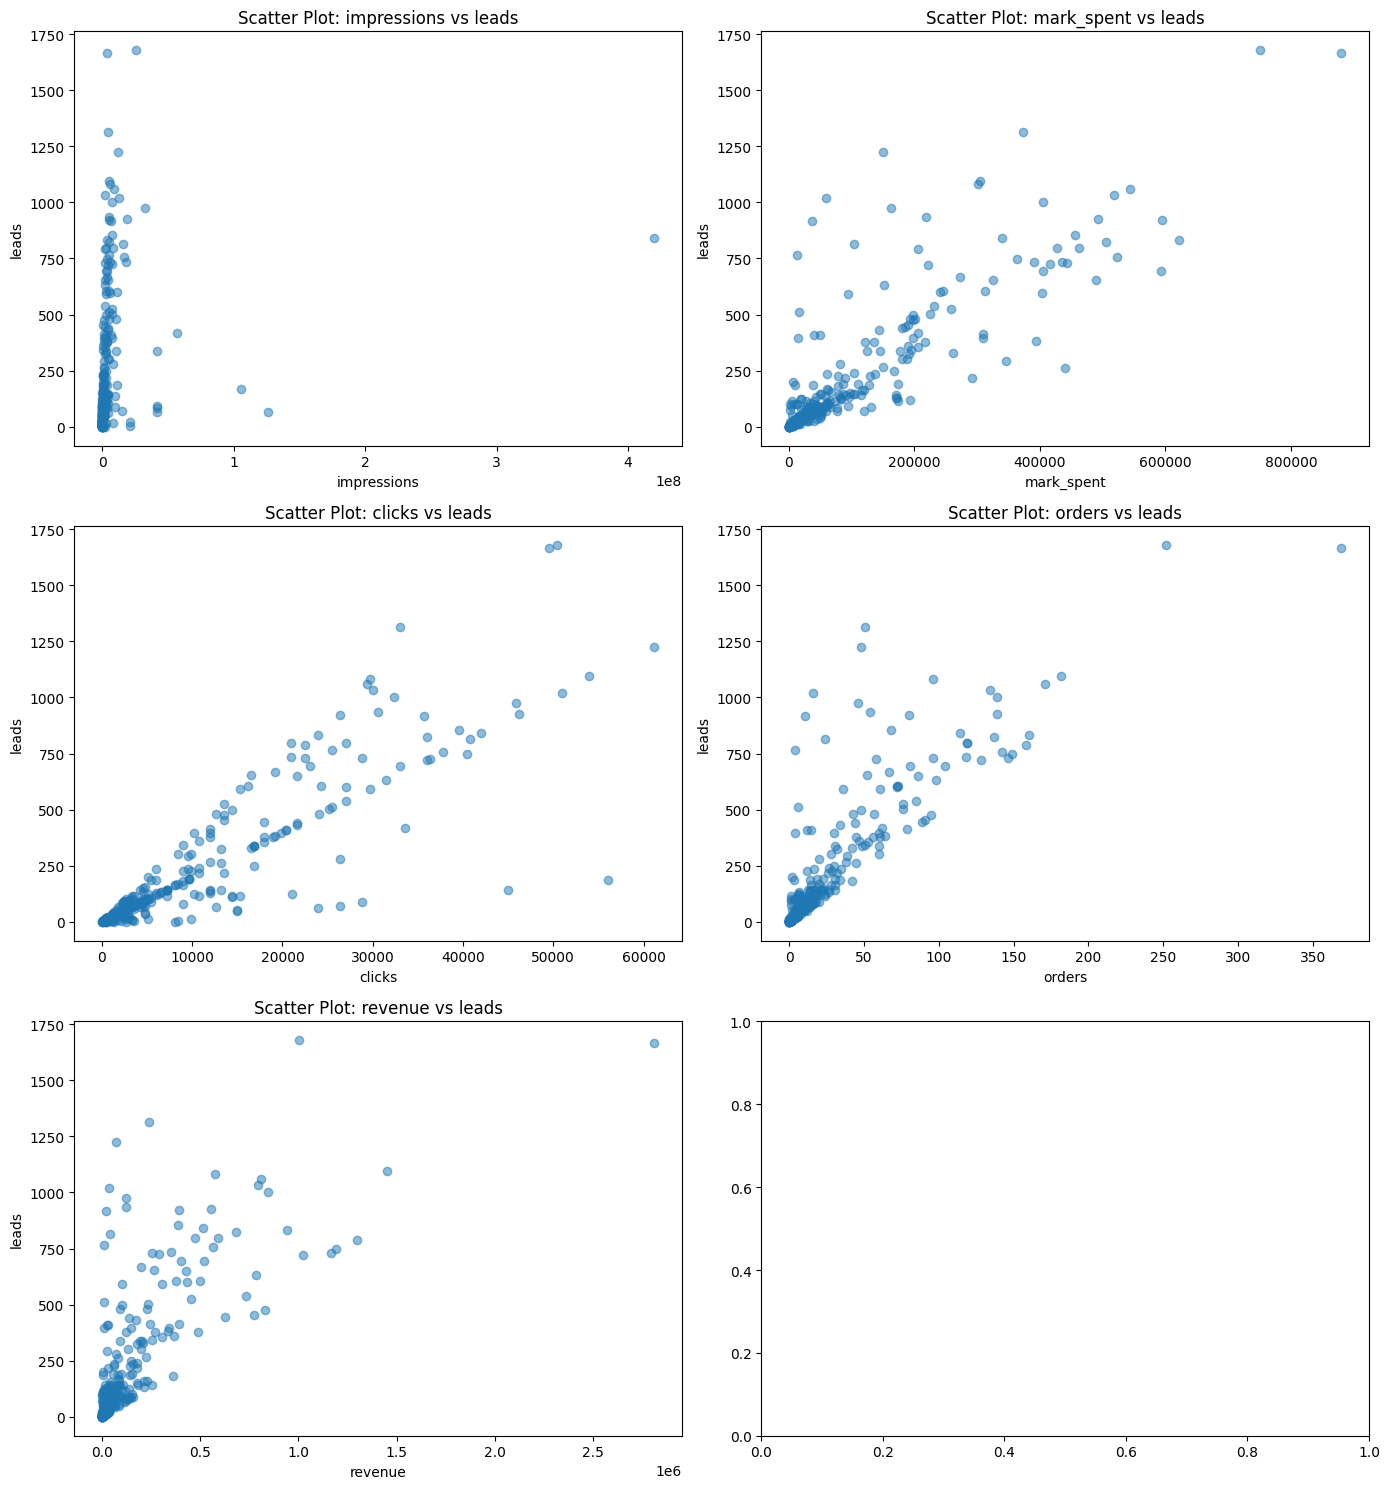

In [15]:
# Scatter plot setiap kolom integer terhadap satu target, misal 'revenue', dalam subplot 3x2
target_col = 'leads'  # ganti dengan kolom target yang diinginkan
cols_to_plot = [col for col in int_cols if col != target_col][:5]  # ambil 6 kolom pertama selain target

fig, axes = plt.subplots(3, 2, figsize=(14, 15))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    axes[i].scatter(df[col], df[target_col], alpha=0.5)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target_col)
    axes[i].set_title(f'Scatter Plot: {col} vs {target_col}')

plt.tight_layout()

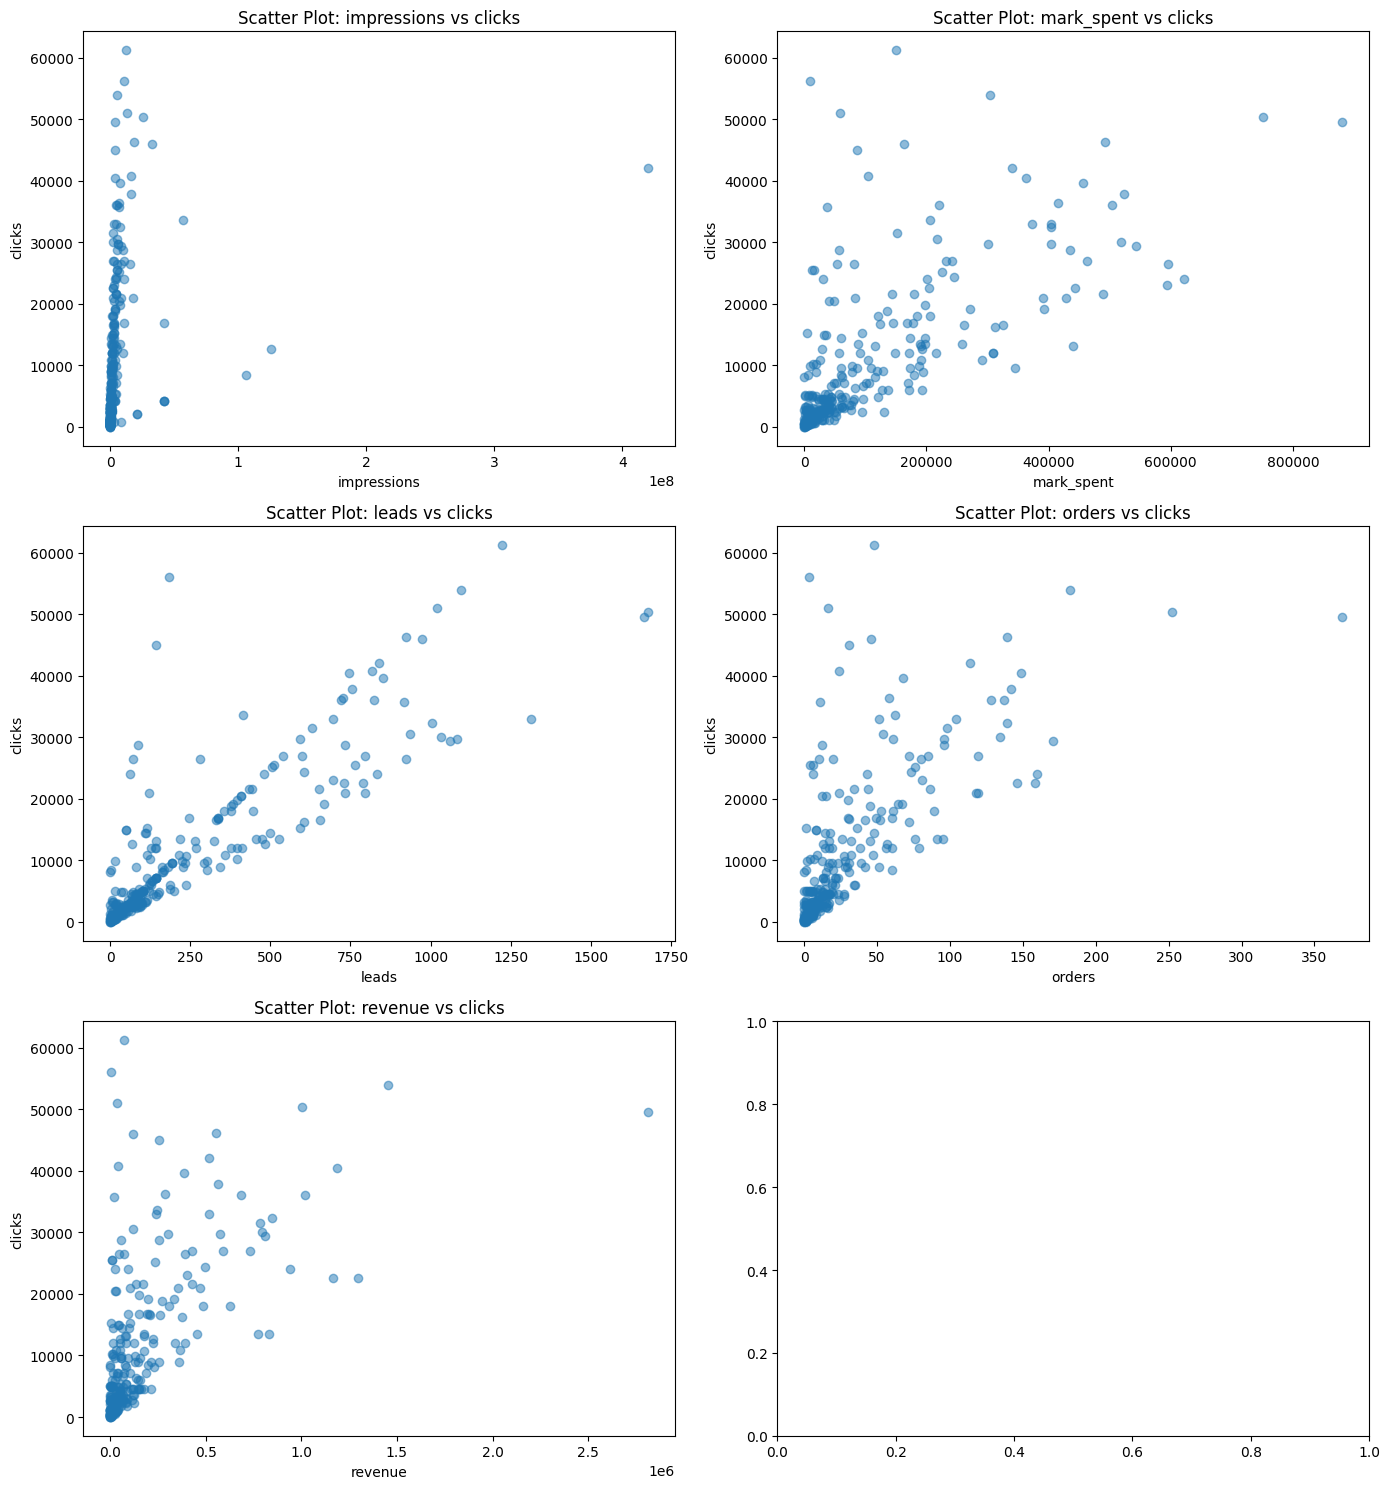

In [16]:
# Scatter plot setiap kolom integer terhadap satu target, misal 'revenue', dalam subplot 3x2
target_col = 'clicks'  # ganti dengan kolom target yang diinginkan
cols_to_plot = [col for col in int_cols if col != target_col][:5]  # ambil 6 kolom pertama selain target

fig, axes = plt.subplots(3, 2, figsize=(14, 15))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    axes[i].scatter(df[col], df[target_col], alpha=0.5)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target_col)
    axes[i].set_title(f'Scatter Plot: {col} vs {target_col}')

plt.tight_layout()

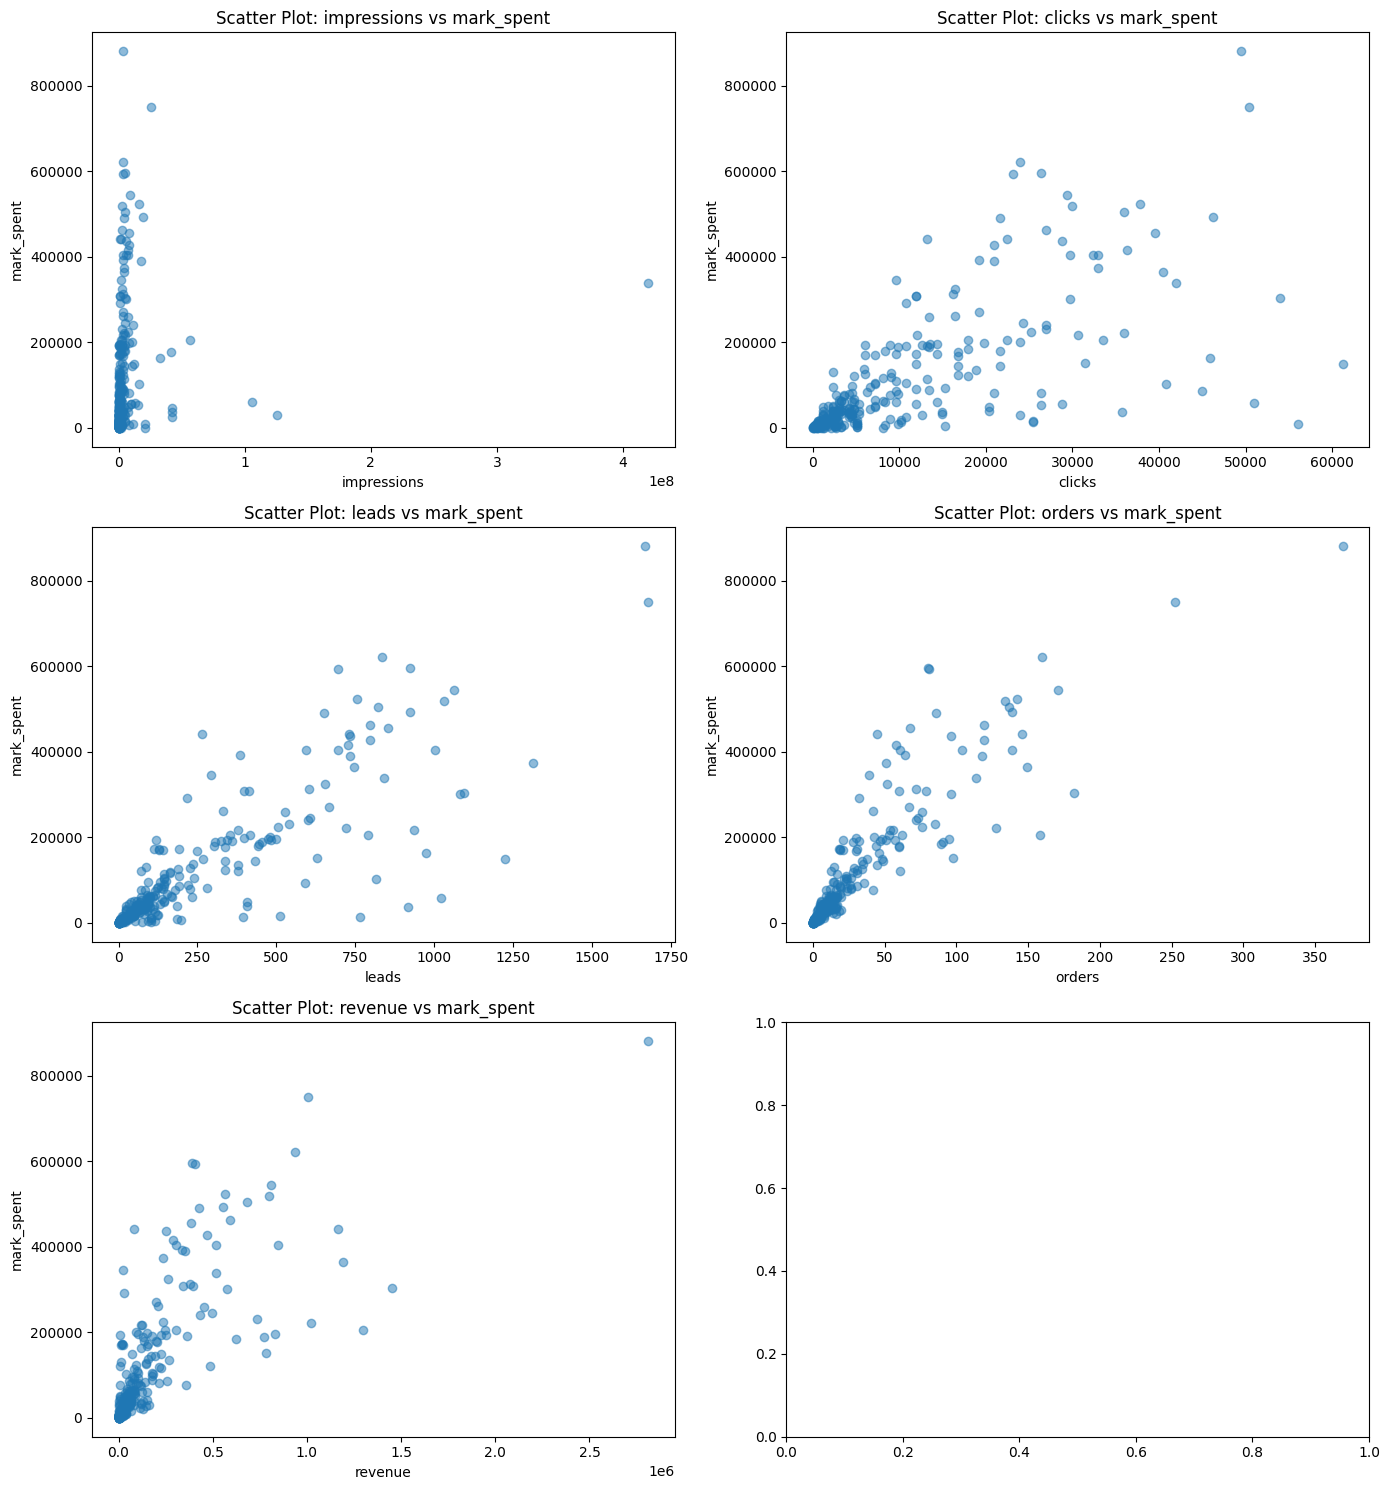

In [17]:
# Scatter plot setiap kolom integer terhadap satu target, misal 'revenue', dalam subplot 3x2
target_col = 'mark_spent'  # ganti dengan kolom target yang diinginkan
cols_to_plot = [col for col in int_cols if col != target_col][:5]  # ambil 6 kolom pertama selain target

fig, axes = plt.subplots(3, 2, figsize=(14, 15))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    axes[i].scatter(df[col], df[target_col], alpha=0.5)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target_col)
    axes[i].set_title(f'Scatter Plot: {col} vs {target_col}')

plt.tight_layout()

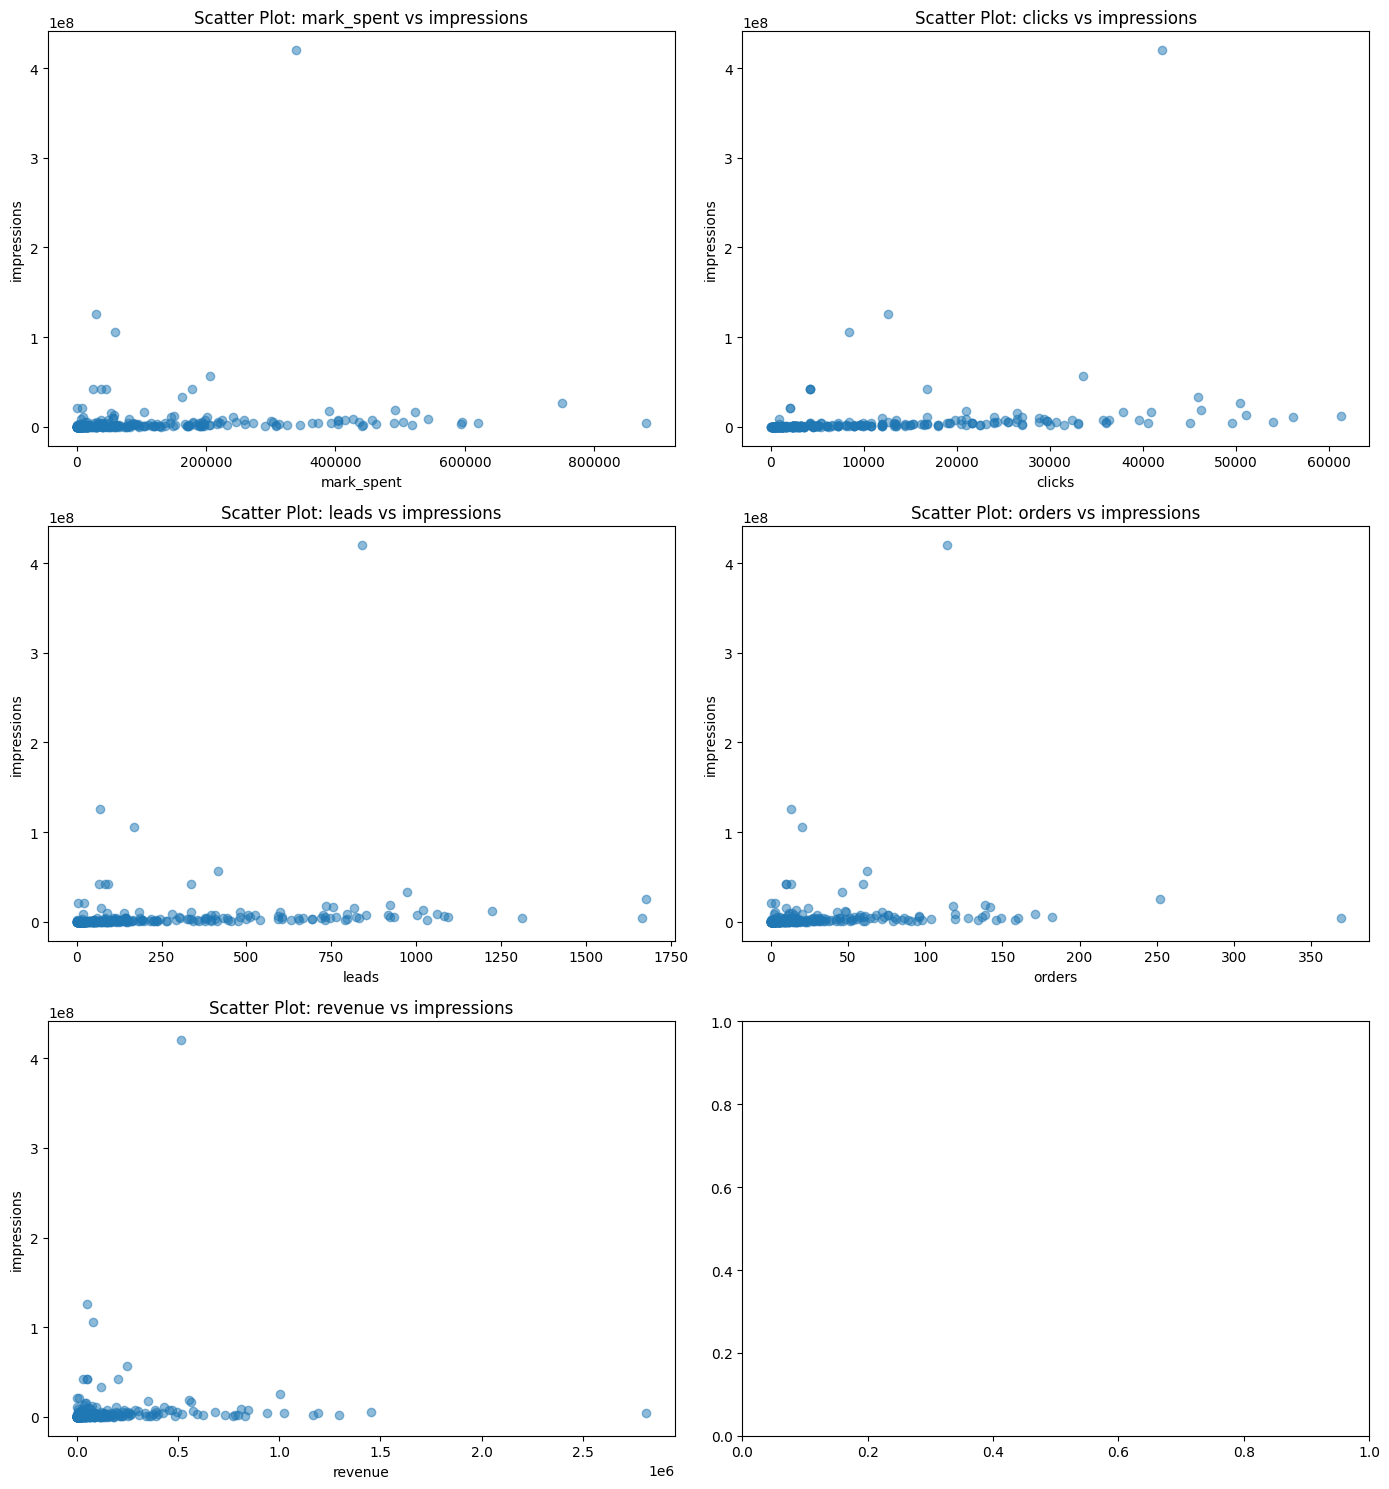

In [18]:
# Scatter plot setiap kolom integer terhadap satu target, misal 'revenue', dalam subplot 3x2
target_col = 'impressions'  # ganti dengan kolom target yang diinginkan
cols_to_plot = [col for col in int_cols if col != target_col][:5]  # ambil 6 kolom pertama selain target

fig, axes = plt.subplots(3, 2, figsize=(14, 15))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    axes[i].scatter(df[col], df[target_col], alpha=0.5)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target_col)
    axes[i].set_title(f'Scatter Plot: {col} vs {target_col}')

plt.tight_layout()

Dari semua scatter plot hanya scatter plot impression yang tidak menunjukan ploa yang menaik dan cenderung datar. Ini semakin memperjelas bahwa impression tidak memiliki korelasi yang kuat dengan variabel lainnya.

In [19]:
# Sum semua metrik int_cols per tanggal
df_sum_per_date = df.groupby('c_date')[int_cols].sum().reset_index()
df_sum_per_date_scaled = df_scaled.groupby('c_date')[int_cols].sum().reset_index()
df_sum_per_date

,c_date,impressions,mark_spent,clicks,leads,orders,revenue
0,2021-02-01,22803592,120844.72,14991,333,30,182676.0
1,2021-02-02,46221902,189064.91,29977,386,54,316369.0
2,2021-02-03,140541998,922808.01,89972,2282,273,1583142.0
3,2021-02-04,58853025,1168337.35,119976,2393,314,1633899.0
4,2021-02-05,42506259,1883989.74,150009,3782,475,2704723.0
5,2021-02-06,46269355,305983.26,29996,628,75,416199.0
6,2021-02-07,9269431,306417.68,29987,805,86,434647.0
7,2021-02-08,6385079,228203.45,29952,530,60,308655.0
8,2021-02-09,8113096,313716.54,29977,641,82,437923.0
9,2021-02-10,16137532,729951.80,59994,1699,193,811363.0


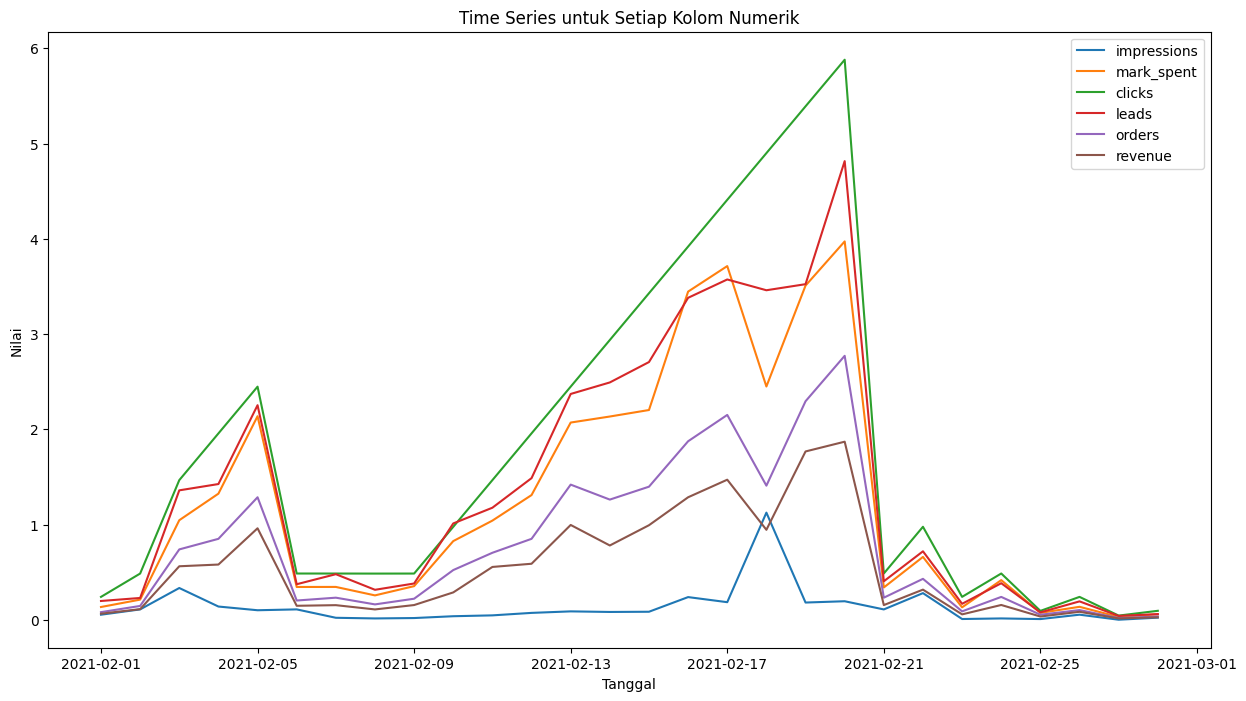

In [20]:
# Pastikan kolom tanggal sudah dalam format datetime, misal 'c_date'
# Plot time series untuk setiap kolom di int_cols

plt.figure(figsize=(15, 8))
for col in int_cols:
    plt.plot(df_sum_per_date_scaled['c_date'], df_sum_per_date_scaled[col], label=col)
    plt.xlabel('Tanggal')
    plt.ylabel('Nilai')
    plt.title('Time Series untuk Setiap Kolom Numerik')
    plt.legend()

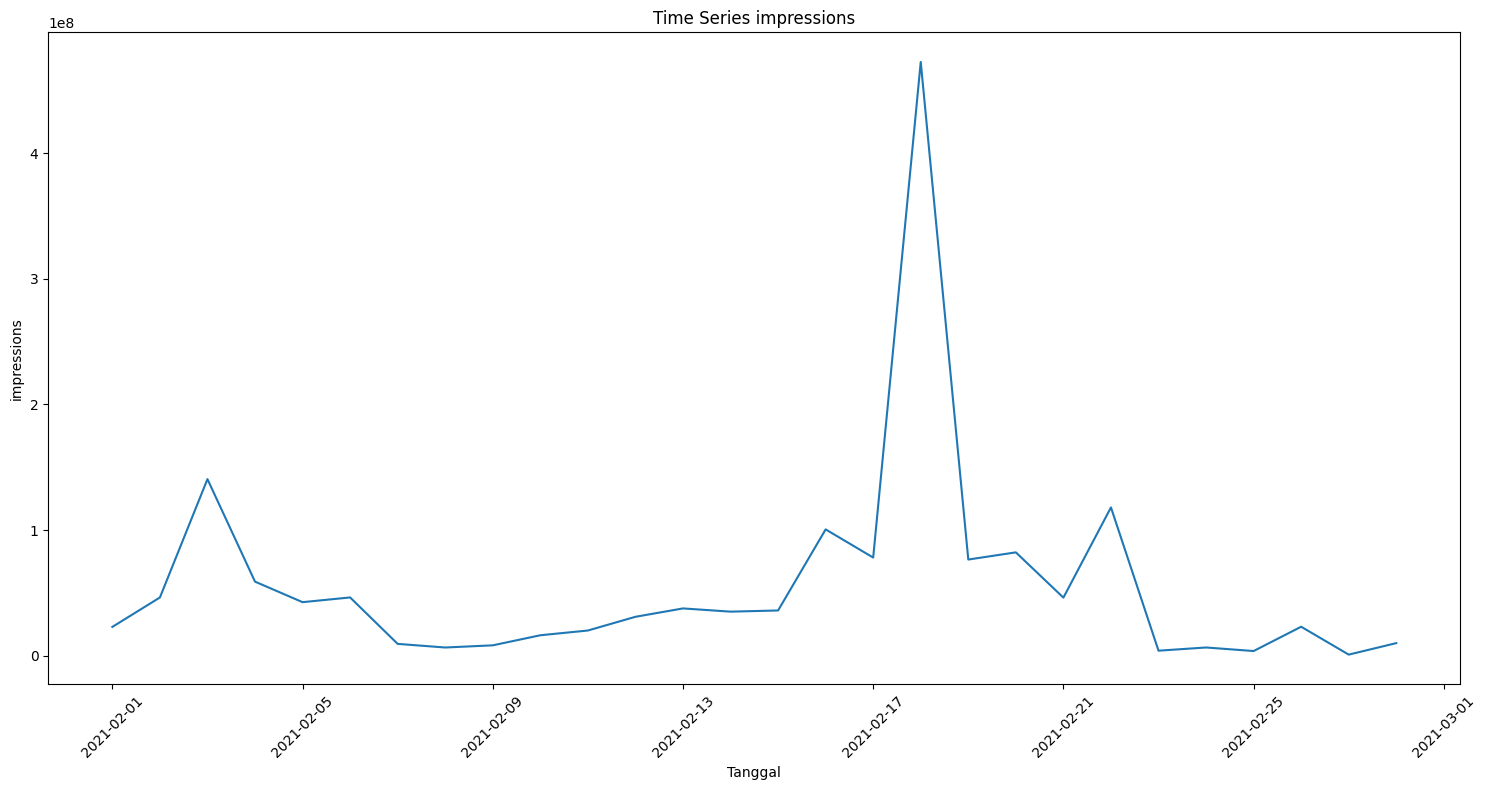

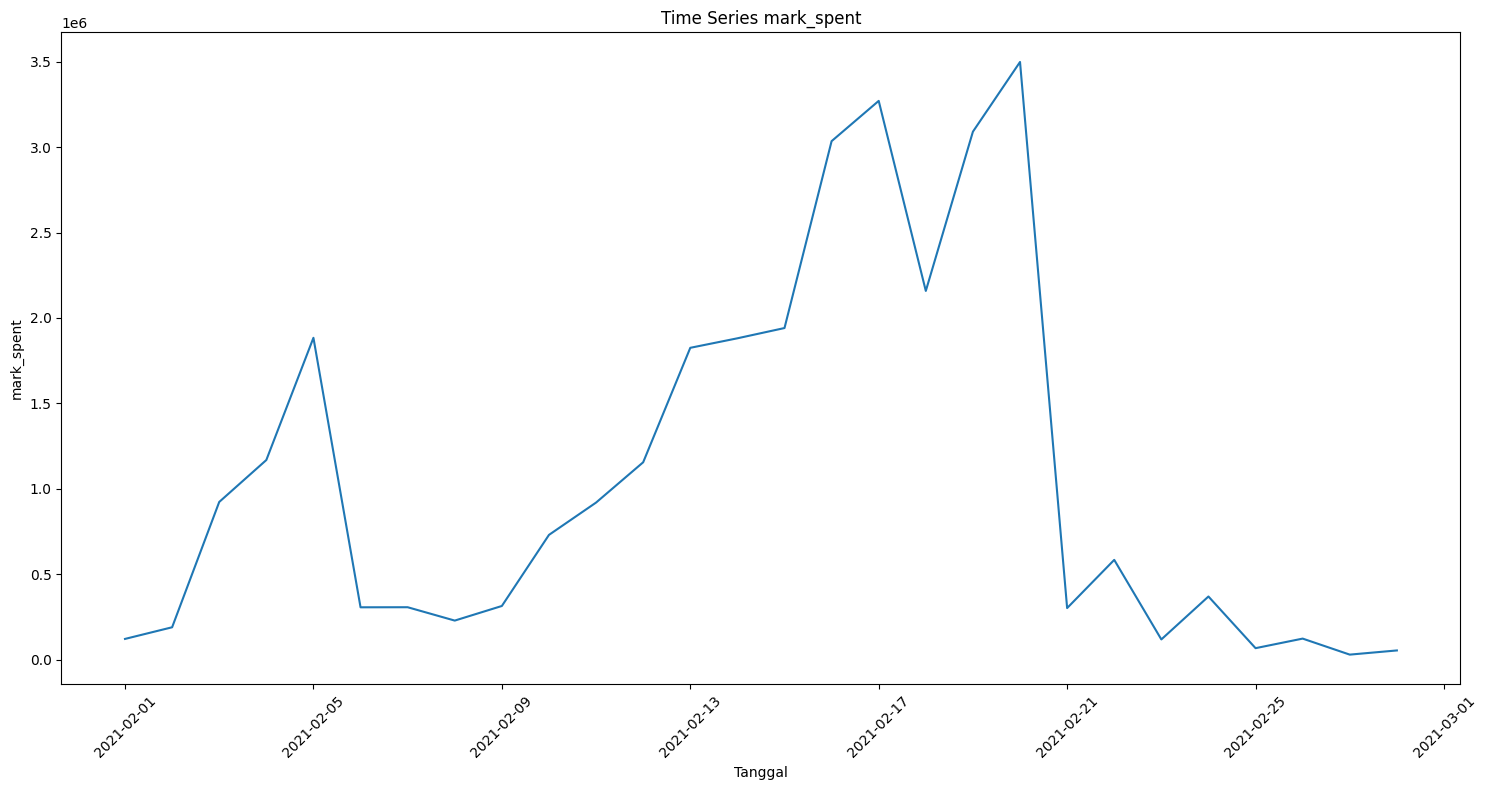

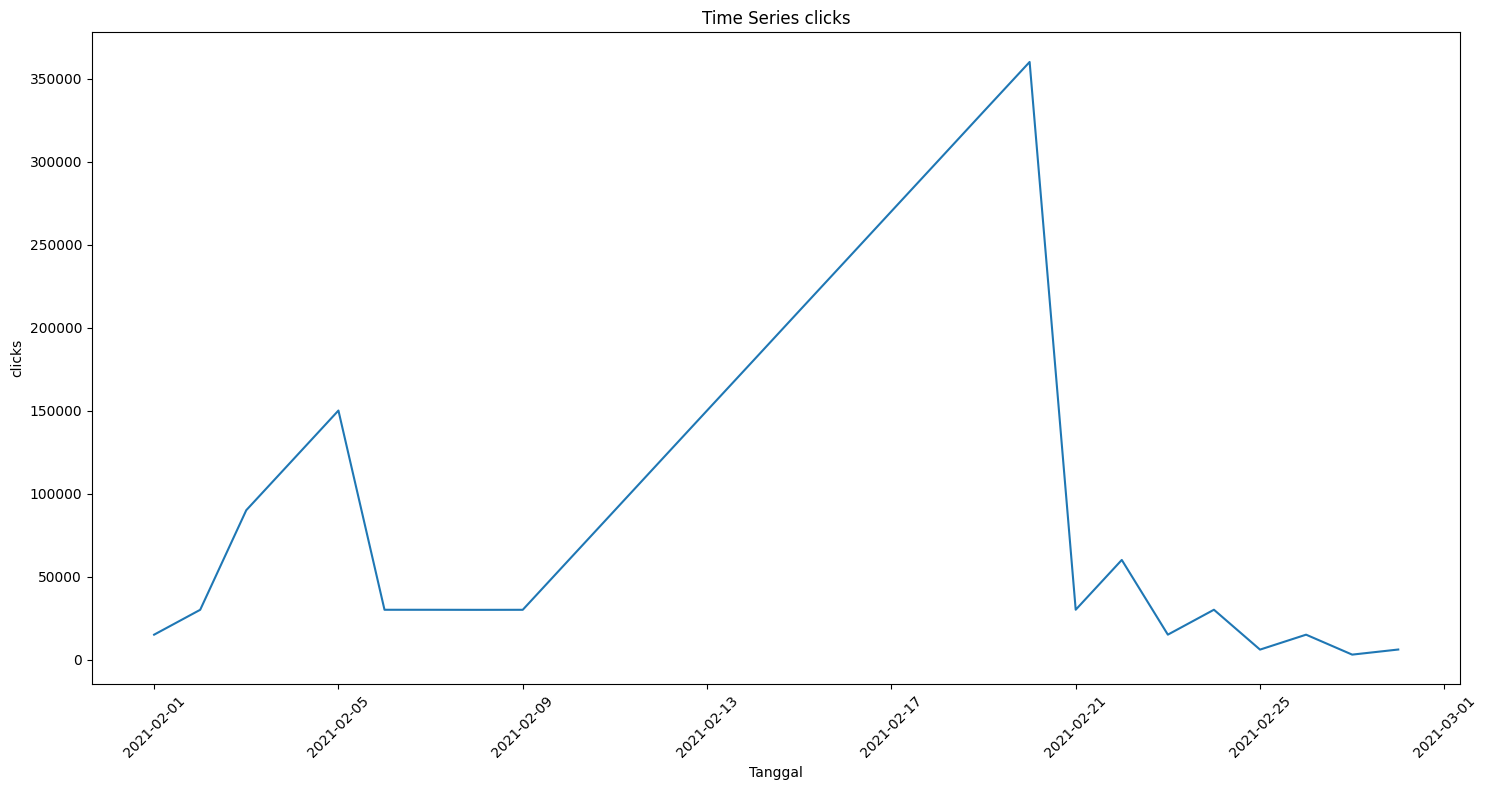

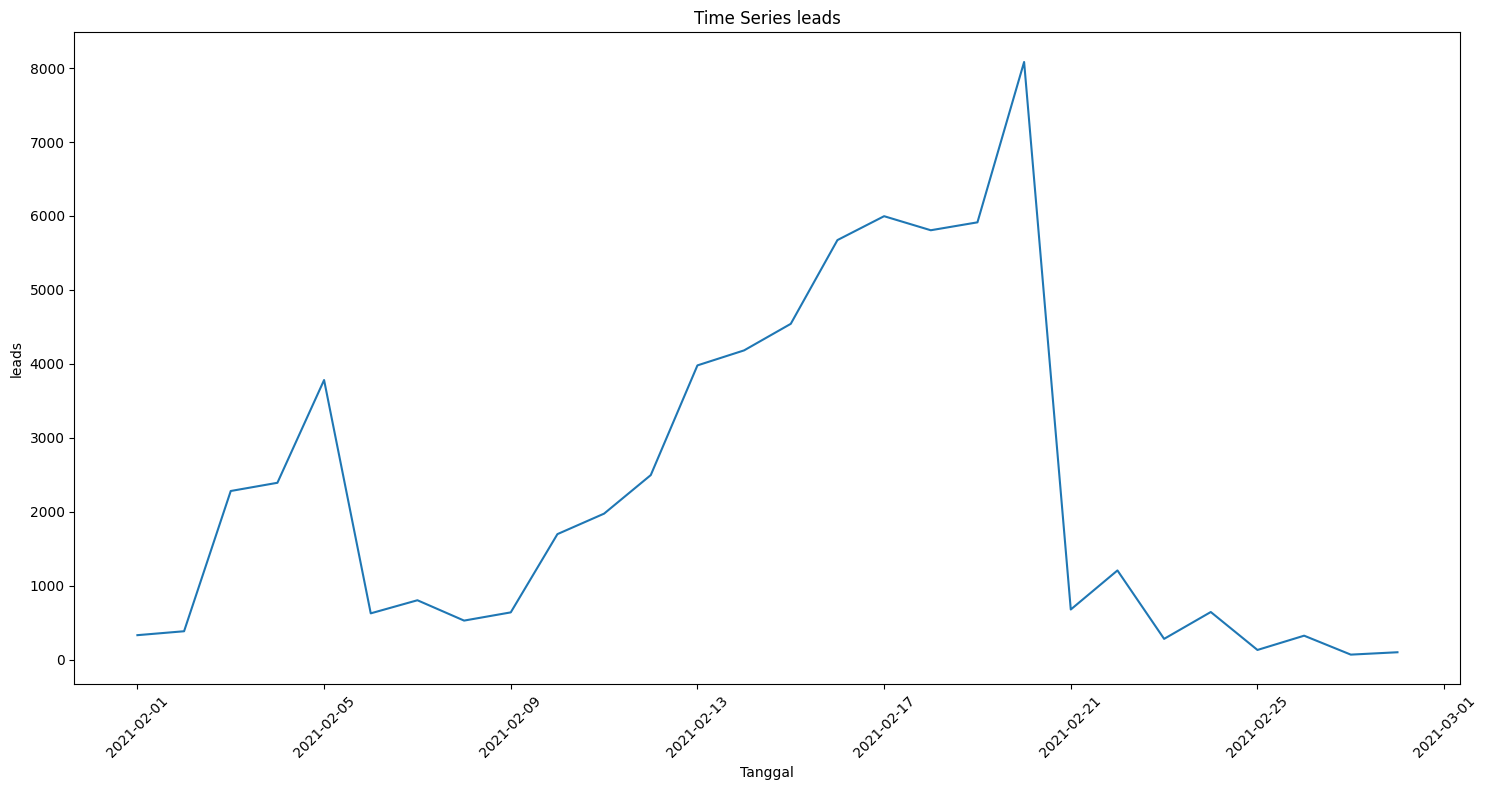

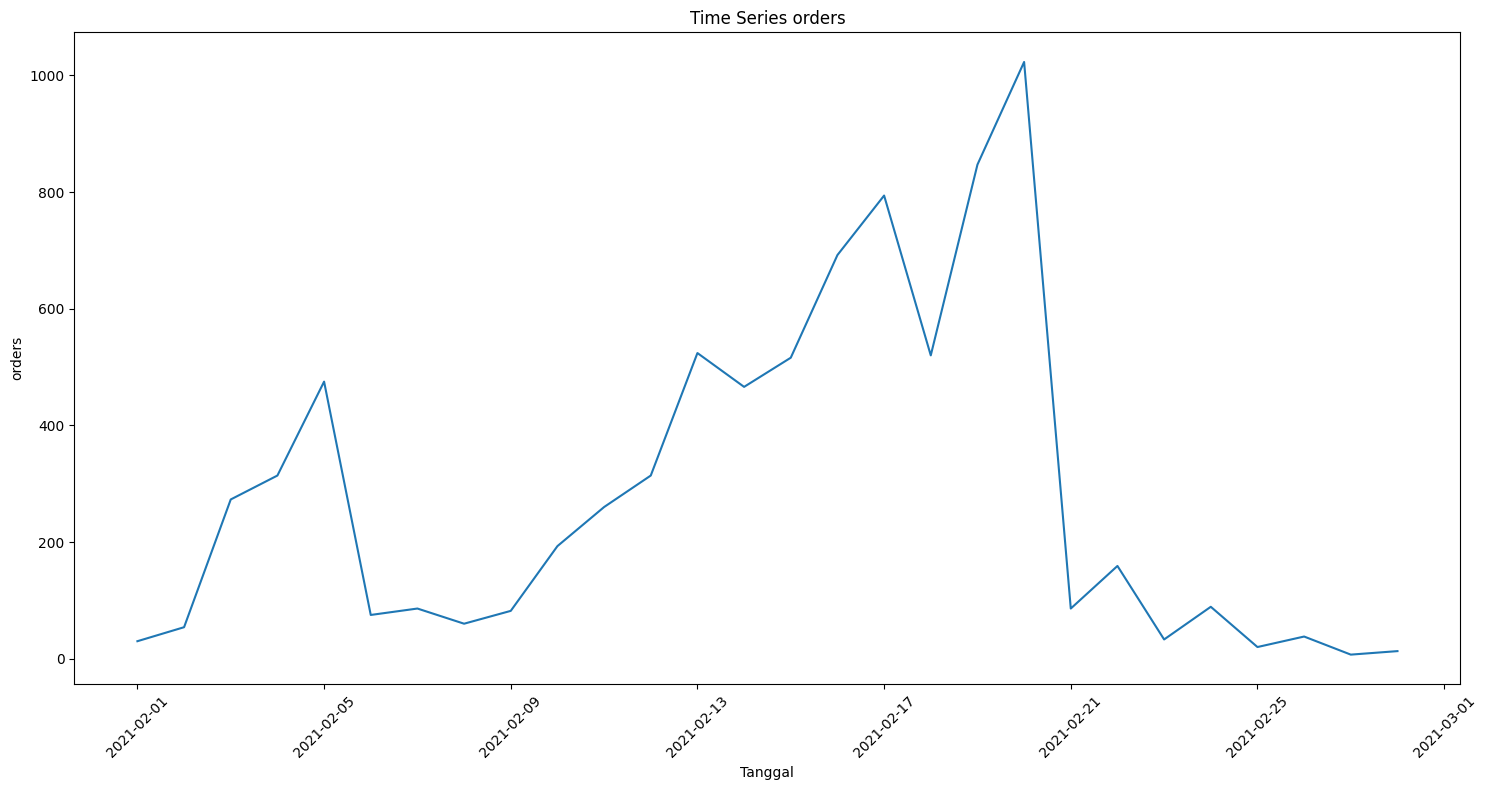

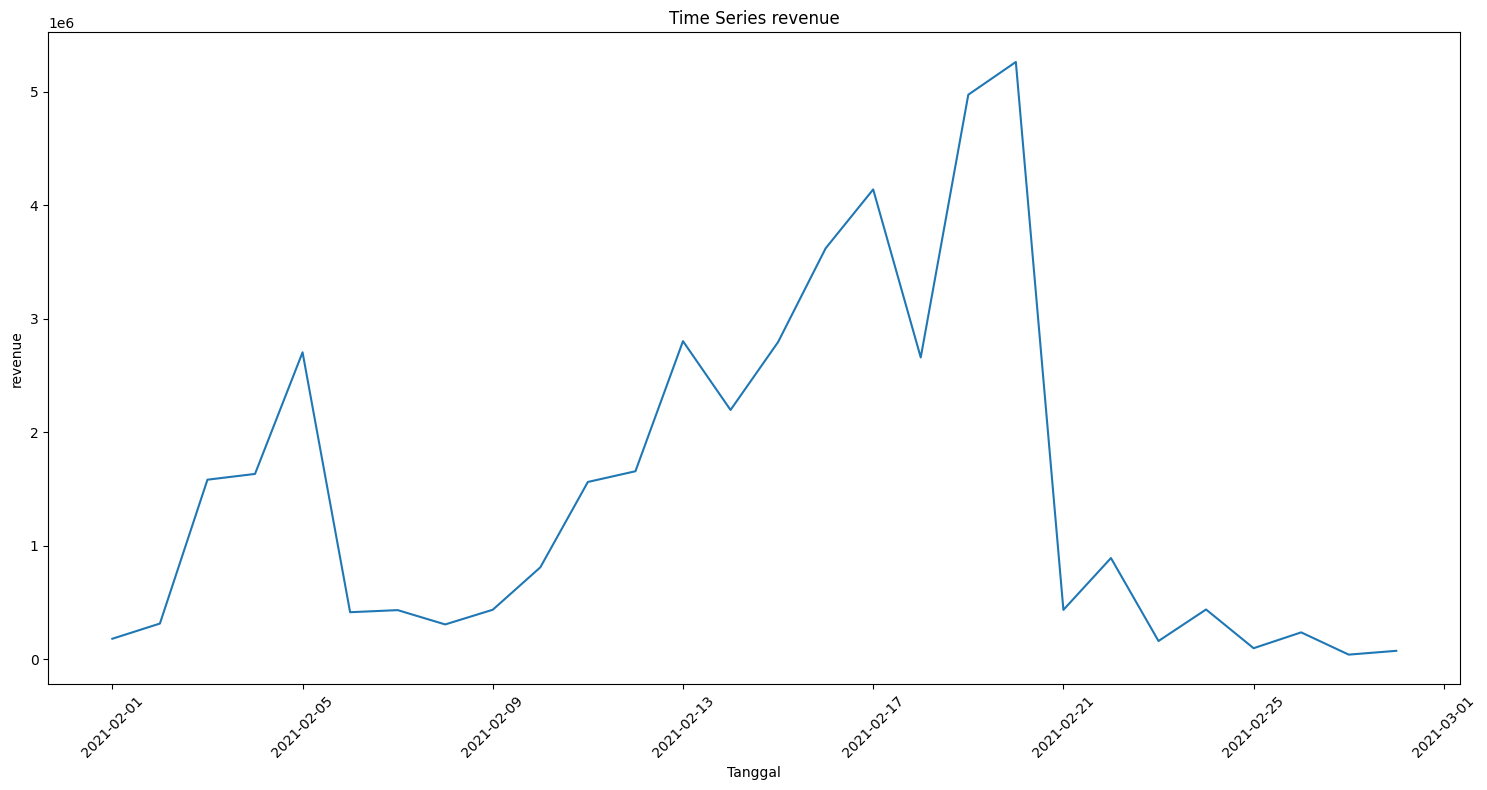

In [21]:
# Plot time series untuk setiap kolom di int_cols (semua tanggal ditampilkan, tidak di-trim)
for col in int_cols:
    plt.figure(figsize=(15, 8))
    plt.plot(df_sum_per_date['c_date'], df_sum_per_date[col])
    plt.xlabel('Tanggal')
    plt.ylabel(col)
    plt.title(f'Time Series {col}')
    plt.xticks(rotation=45)  # agar tanggal terlihat jelas
    plt.tight_layout()
    plt.show()

# Metric Evaluation

## Overall ROMI

In [22]:
#ROMI
romi = (df['revenue'].sum() - df['mark_spent'].sum()) / df['mark_spent'].sum()
print(f"ROMI: {romi}")

ROMI: 0.40203113648138283


ROMI merupakan metric yang digunakan untuk menghitung keuntungan yang didapatkan dari campaign yang dilakukan. ROMI yang menguntungkan memiliki nilai yang lebih dari 0. jika kurang dari 0 berarti campaign yang dilakukan merugikan. Nilai ROMI diatas mengartikan bahwa setiap 1 spent yang dilakukan kita mendapatkan keuntungan sebesar 0.402, yang berarti hasim campaign masih menguntungkan.

## ROMI by campaign_name

In [23]:
cn_romi_data = df.groupby('campaign_name')[int_cols].sum().reset_index()
cn_romi_data['romi'] = (cn_romi_data['revenue'] - cn_romi_data['mark_spent']) / cn_romi_data['mark_spent']
cn_romi_data = cn_romi_data.sort_values(by='romi', ascending=False)
print(cn_romi_data)

           campaign_name  impressions  mark_spent  clicks  leads  orders   
10       youtube_blogger     43688313  4057936.51  450014   9931    1914  \
2   facebook_retargeting       976685   266466.22   29954    506     108   
5             google_hot      4628993  1199998.76   90048   1833     281   
8        instagram_tier1     75136799  2565277.25  269961   6632     758   
7      instagram_blogger     34112411  4247367.57  299959   7008    1100   
0         banner_partner   1068337427  5026674.76  420003  10149    1566   
3         facebook_tier1     63044882  2564793.48  239997   3535     474   
4         facebook_tier2     69623161  4693870.97  329973   8428     688   
6            google_wide     67669259  2260401.31  240006   5274     547   
9        instagram_tier2    137806768  1066153.75  509992  10374     313   
1           facebook_lal     12697701  2641939.24  120012   1909     294   

       revenue      romi  
10  15311433.0  2.773207  
2     536919.0  1.014961  
5    2

Jika dilihat berdasarkan Campaign name ternyata ada campaign yang merugikan dengan nilai ROMI negatif. Kebanyakan campaign yang dilakukan di facebook menghasilkan ROMI negatif. Bisa dibilang bahwa customer perusahaan ini hanya sdikit yang main facebook. Untuk ROMI negatif bisa dihilangkan. Tapi untuk facebook hanya 1 cara yang efektif yaitu facebook_retergeting yang menghasilkan ROMI terbesar kedua.

banner partner dan instagram blogger memiliki nilai romi yang cukup rendah. Mungkin bisa dilakukan improvement pada kedua campaign ini.

## Campaign data per Date

In [24]:
# Tambahkan kolom frekuensi pembelian (jumlah baris per tanggal)
df_freq_per_date = df.groupby('c_date').size().reset_index(name='purchase_frequency')

# Gabungkan frekuensi ke df_sum_per_date
df_sum_per_date = pd.merge(df_sum_per_date, df_freq_per_date, on='c_date', how='left')

In [25]:
df_avg_per_date = df.groupby('c_date')[int_cols].mean().reset_index()
df_avg_per_date_scaled = df_scaled.groupby('c_date')[int_cols].mean().reset_index()
print(df_avg_per_date.head())

      c_date   impressions     mark_spent        clicks       leads   
0 2021-02-01  2.073054e+06   10985.883636   1362.818182   30.272727  \
1 2021-02-02  4.201991e+06   17187.719091   2725.181818   35.090909   
2 2021-02-03  1.277655e+07   83891.637273   8179.272727  207.454545   
3 2021-02-04  5.350275e+06  106212.486364  10906.909091  217.545455   
4 2021-02-05  3.864205e+06  171271.794545  13637.181818  343.818182   

      orders        revenue  
0   2.727273   16606.909091  
1   4.909091   28760.818182  
2  24.818182  143922.000000  
3  28.545455  148536.272727  
4  43.181818  245883.909091  


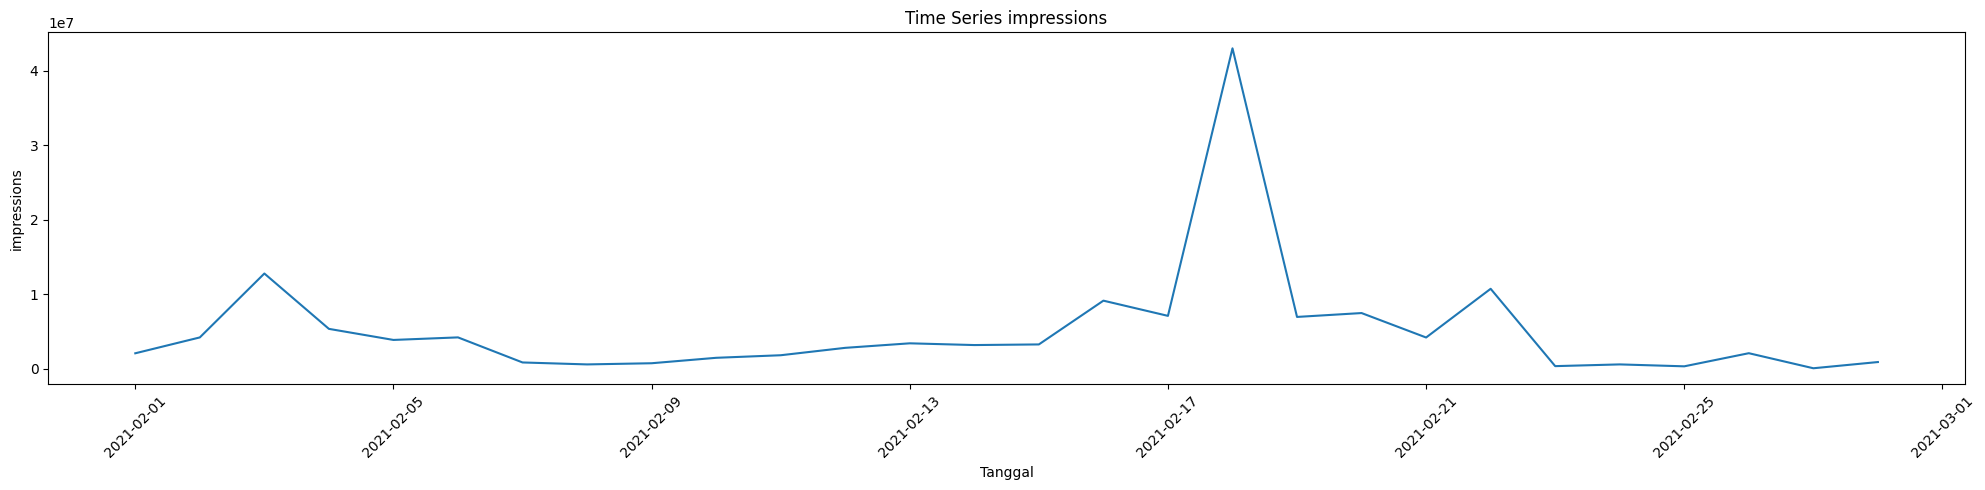

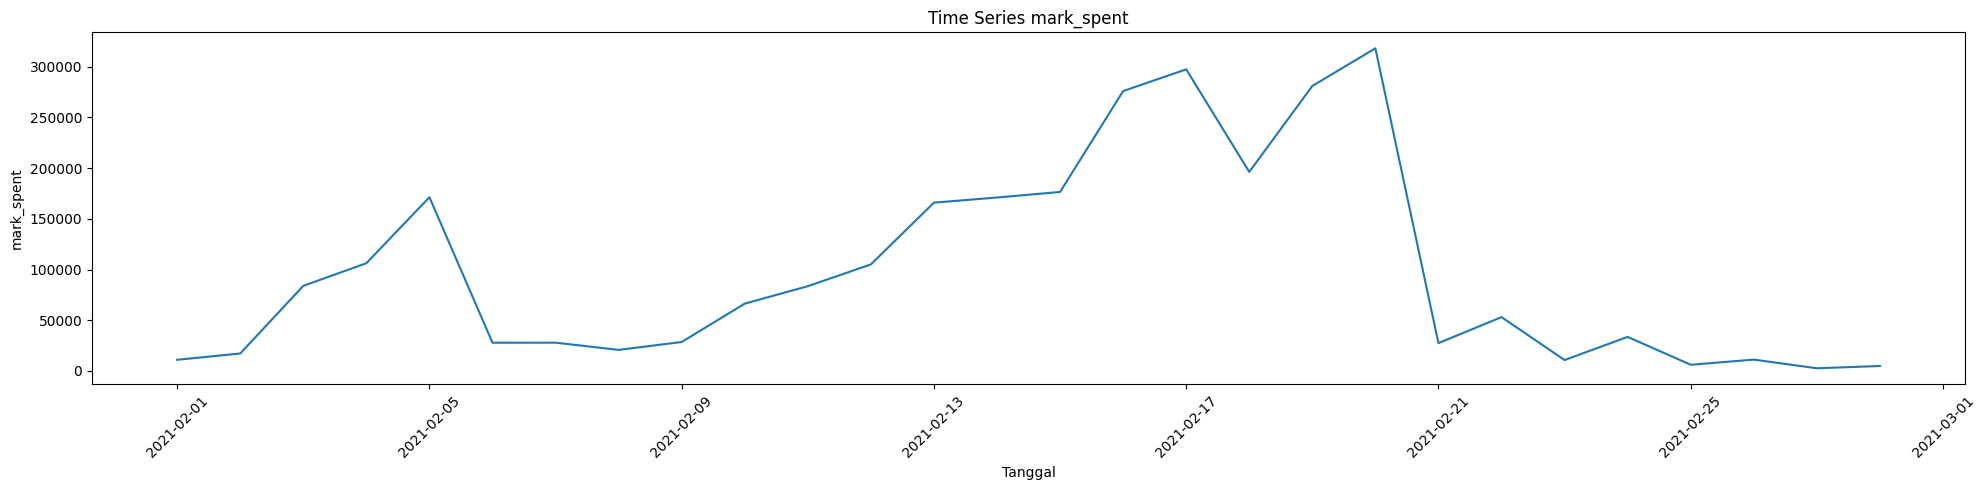

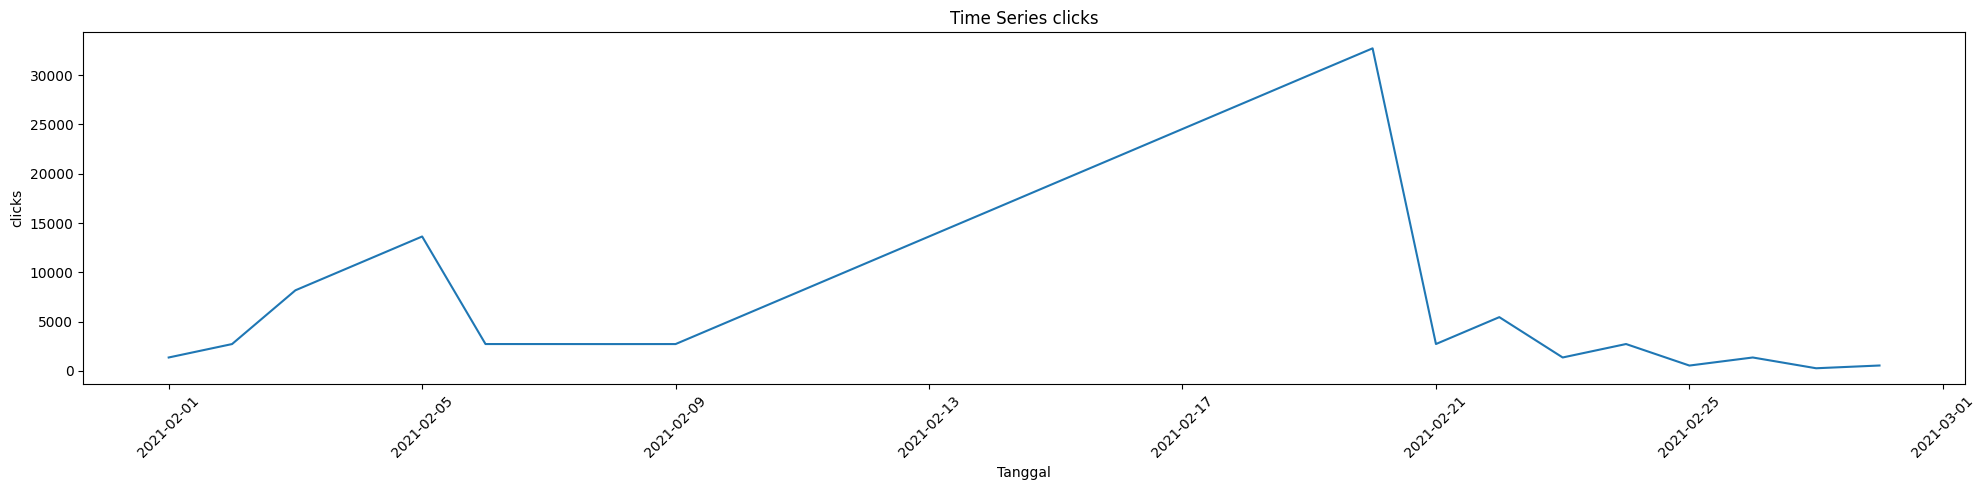

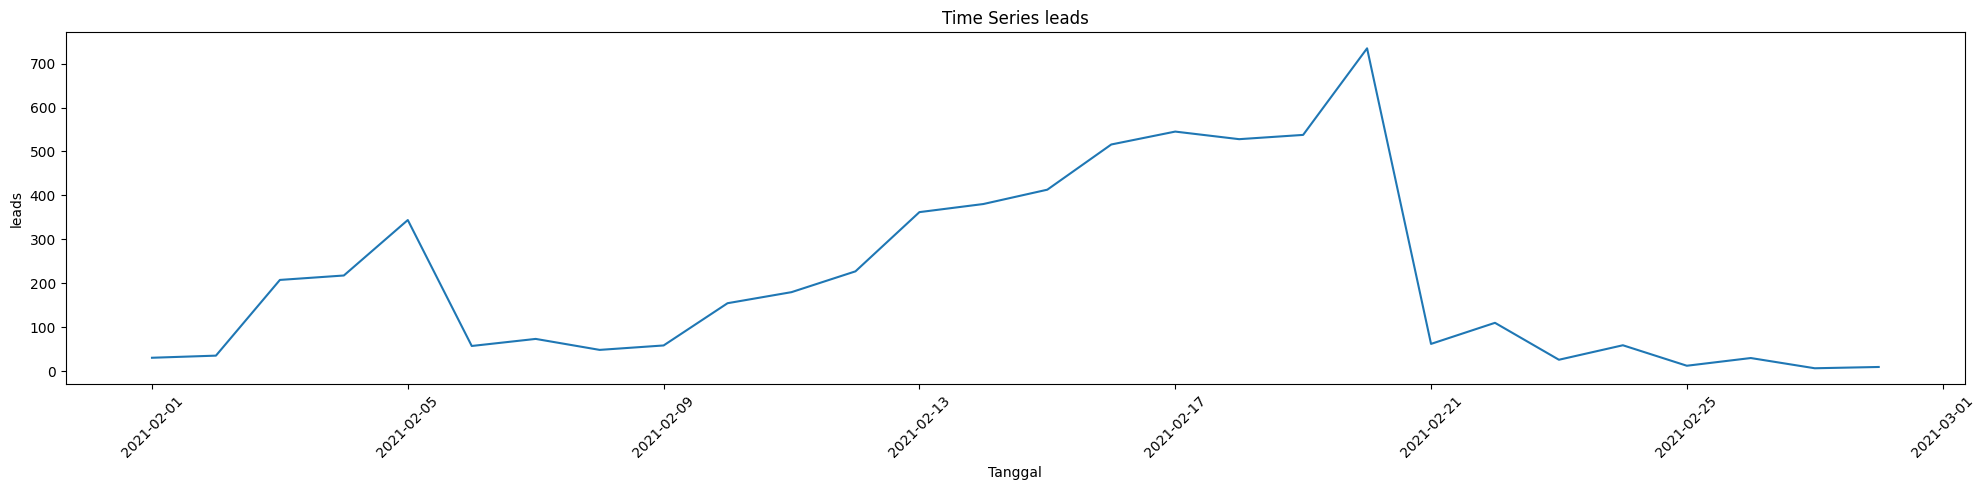

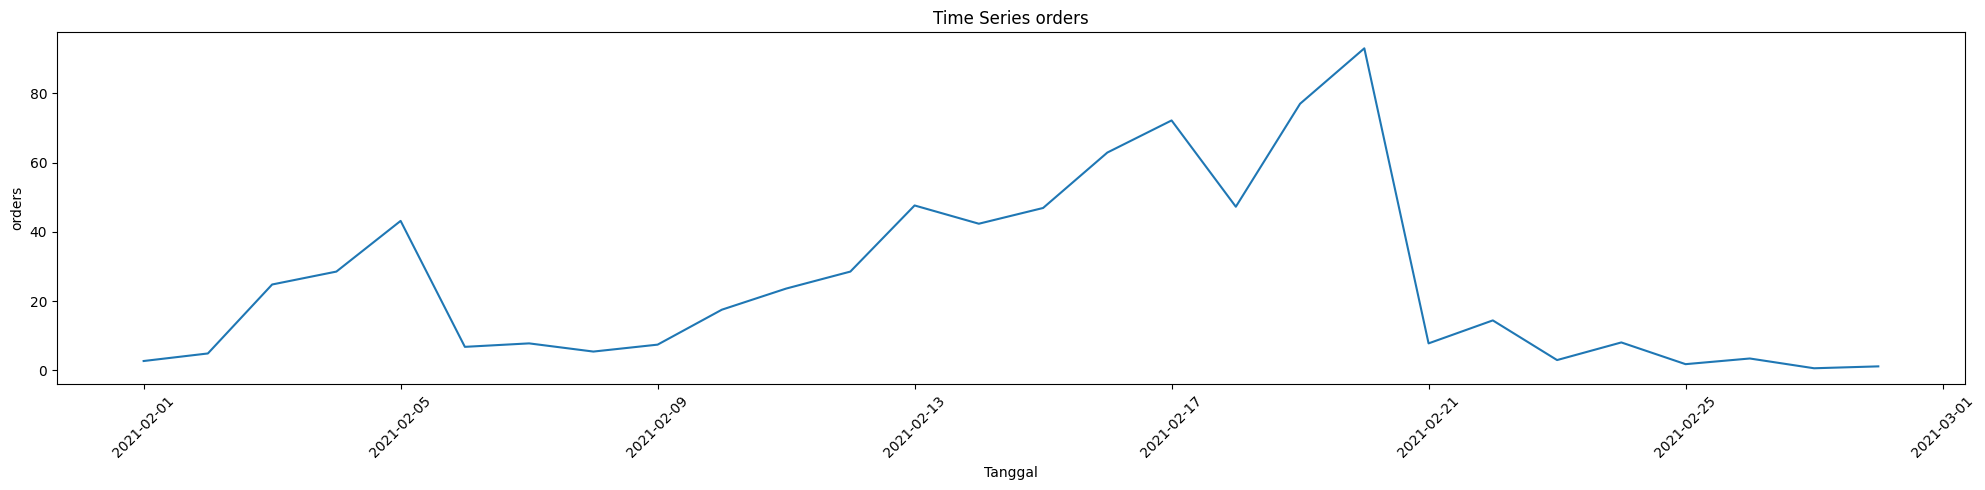

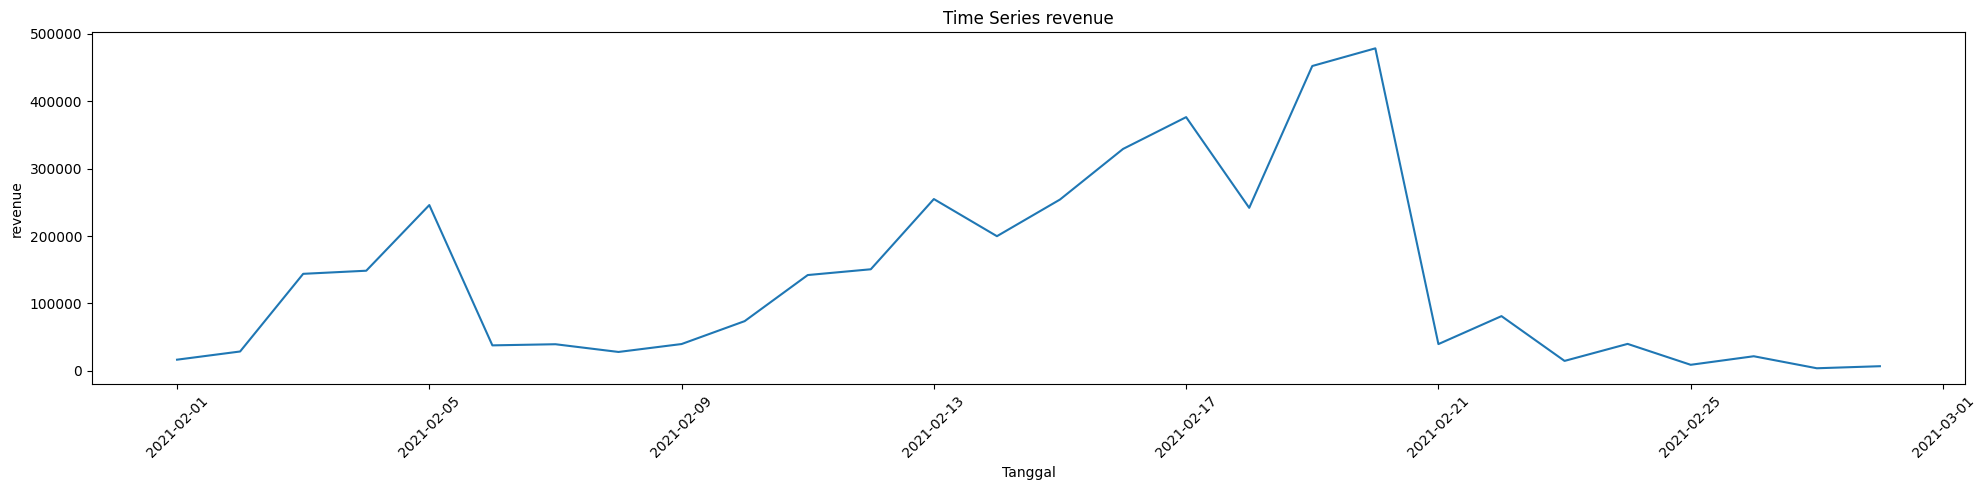

In [26]:
# Plot time series untuk setiap kolom di int_cols (semua tanggal ditampilkan, tidak di-trim)
for col in int_cols:
    plt.figure(figsize=(20, 5))
    plt.plot(df_avg_per_date['c_date'], df_avg_per_date[col])
    plt.xlabel('Tanggal')
    plt.ylabel(col)
    plt.title(f'Time Series {col}')
    plt.xticks(rotation=45)  # agar tanggal terlihat jelas
    plt.tight_layout()
    plt.show()

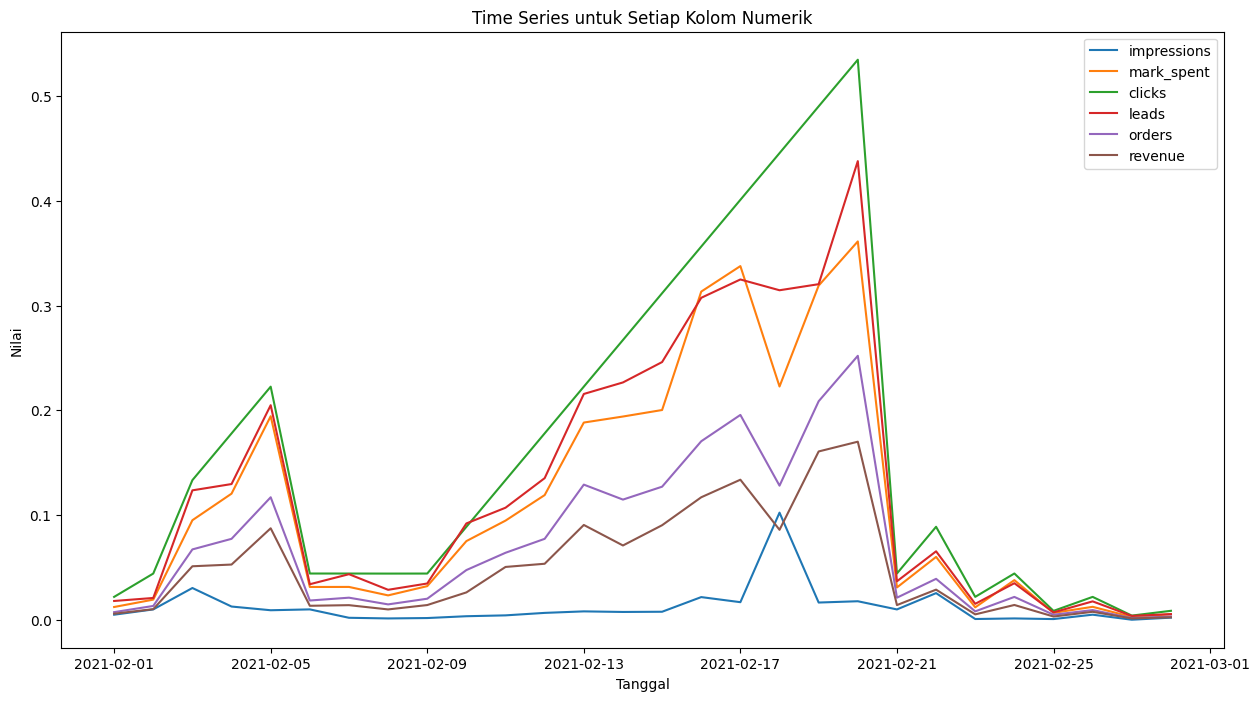

In [27]:
# Pastikan kolom tanggal sudah dalam format datetime, misal 'c_date'
# Plot time series untuk setiap kolom di int_cols

plt.figure(figsize=(15, 8))
for col in int_cols:
    plt.plot(df_avg_per_date_scaled['c_date'], df_avg_per_date_scaled[col], label=col)
    plt.xlabel('Tanggal')
    plt.ylabel('Nilai')
    plt.title('Time Series untuk Setiap Kolom Numerik')
    plt.legend()

Berdasarkan plot time series diatas hampir semua metrik mencapai puncaknya di tanggal 20 Februari, hal ini bisa mengindikasikan bahwa ada aksi yang terjadi di tanggal tersebut, seperti kenaikan cost yang dikeluarkan mengingat hampir semua metrik mempunyai korelasi positif. Atau juga ada konten campaign ekslusif yang dilakukan pada tanggal tersebut.

Tetapi di sisi lain lead rate memiliki persentase yang paling tinggi, ini bisa menandakan bahwa produk yang diiklankan berhasil mencapai customer dengan karakter yang sesuai dengan brand yang dimiliki.

## Average of Order

In [29]:
df_sum_per_date["AOV"]= df_sum_per_date['revenue'] / df_sum_per_date['purchase_frequency']

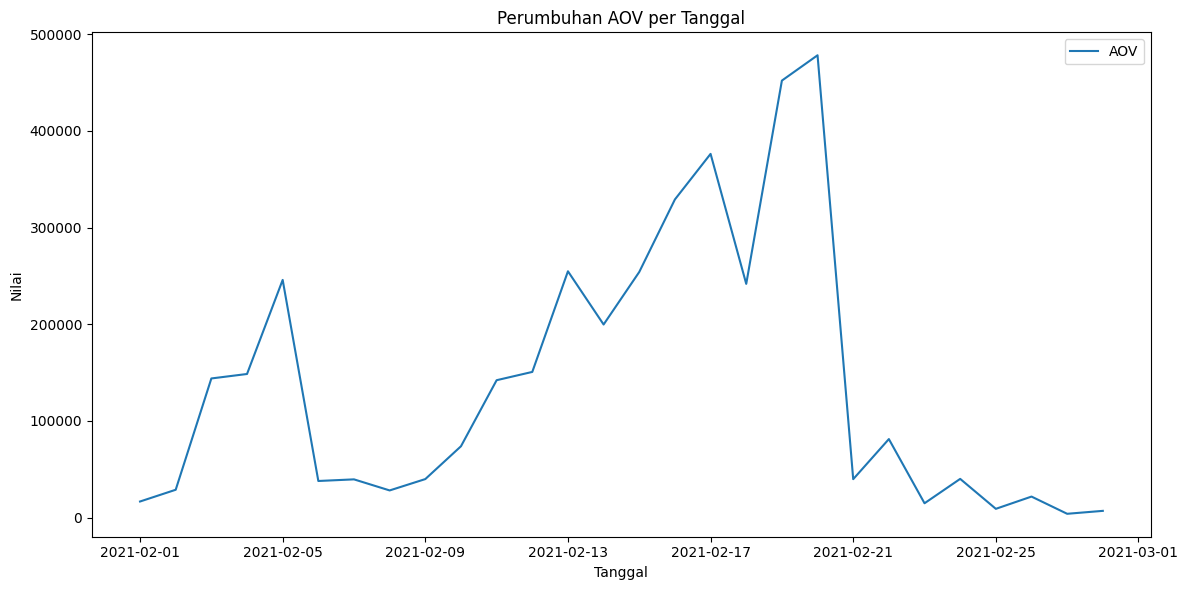

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df_sum_per_date['c_date'], df_sum_per_date['AOV'], label='AOV')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.title(f'Perumbuhan AOV per Tanggal')
plt.legend()
plt.tight_layout()
plt.show()

## Conversion Rate

In [31]:
ctr_total = (df['clicks'].sum() / df['impressions'].sum()) * 100
print(f"CTR Total: {ctr_total:.4f}")

CTR Total: 0.1901


In [32]:
df_sum_per_date["click_rate"] = (df_sum_per_date['clicks'] / df_sum_per_date['impressions']) * 100
df_sum_per_date["lead_rate"] = (df_sum_per_date['leads'] / df_sum_per_date['clicks']) * 100
df_sum_per_date["orders_rate"] = (df_sum_per_date['orders'] / df_sum_per_date['leads']) * 100

In [33]:
df_sum_per_date_scaled["click_rate"] = df_sum_per_date_scaled['clicks'] / df_sum_per_date_scaled['impressions']
df_sum_per_date_scaled["lead_rate"] = df_sum_per_date_scaled['leads'] / df_sum_per_date_scaled['clicks']
df_sum_per_date_scaled["orders_rate"] = df_sum_per_date_scaled['orders'] / df_sum_per_date_scaled['leads']

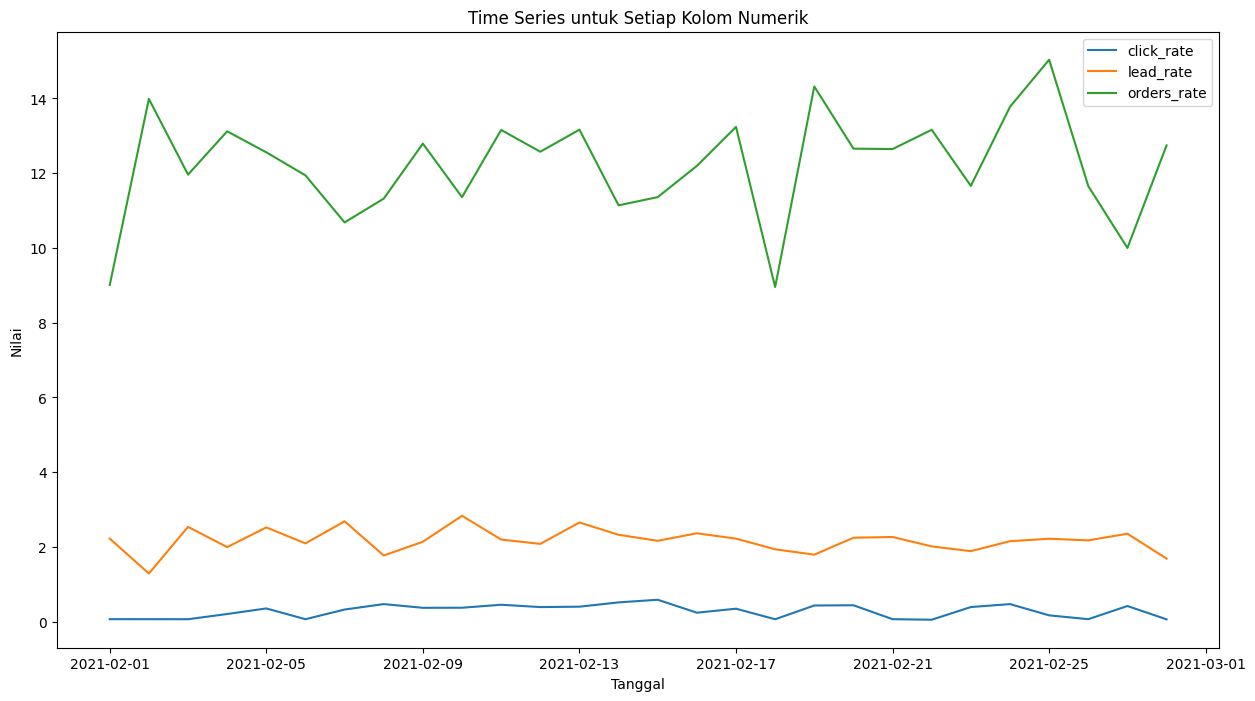

In [34]:
rate_col = ['click_rate', 'lead_rate', 'orders_rate']

# Pastikan kolom tanggal sudah dalam format datetime, misal 'c_date'
# Plot time series untuk setiap kolom di int_cols

plt.figure(figsize=(15, 8))
for col in rate_col:
    plt.plot(df_sum_per_date['c_date'], df_sum_per_date[col], label=col)
    plt.xlabel('Tanggal')
    plt.ylabel('Nilai')
    plt.title('Time Series untuk Setiap Kolom Numerik')
    plt.legend()

Dari Plot diatas bisa disimpulkan bahwa click through rate menjadi metrik dengan konversi terendah. Ini menandakan bahwa perlu adanya peningkatan dalam konten iklan atau promosi yang dilakukan agar lebih banyak lagi orang yang tertarik untuk mengetahui lebih lanjut mengenai produk yang di iklankan.

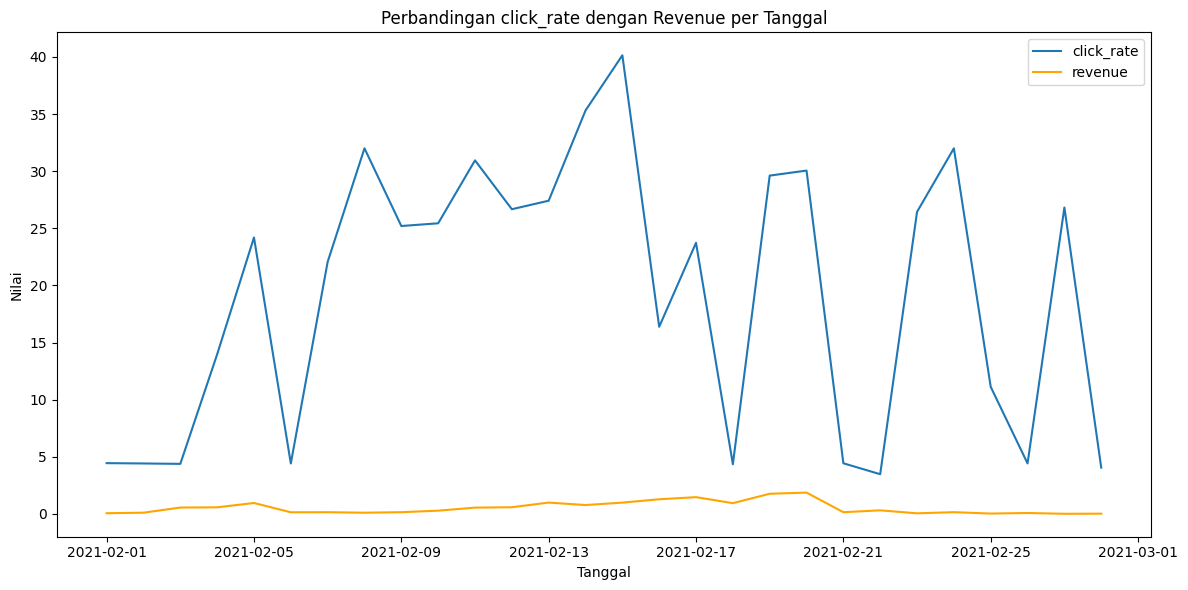

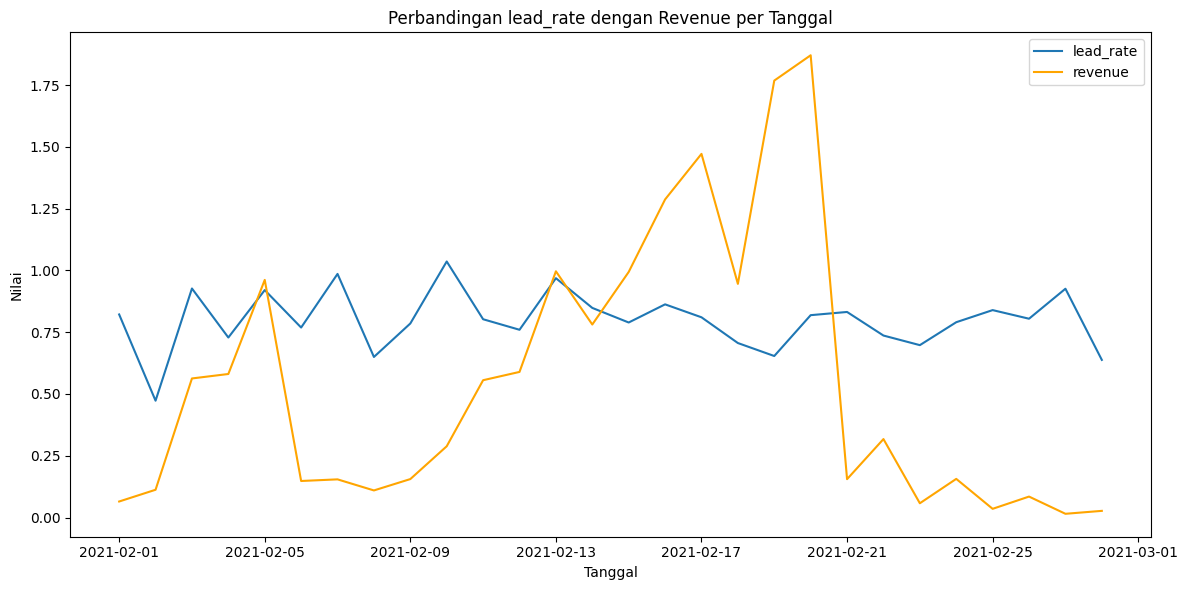

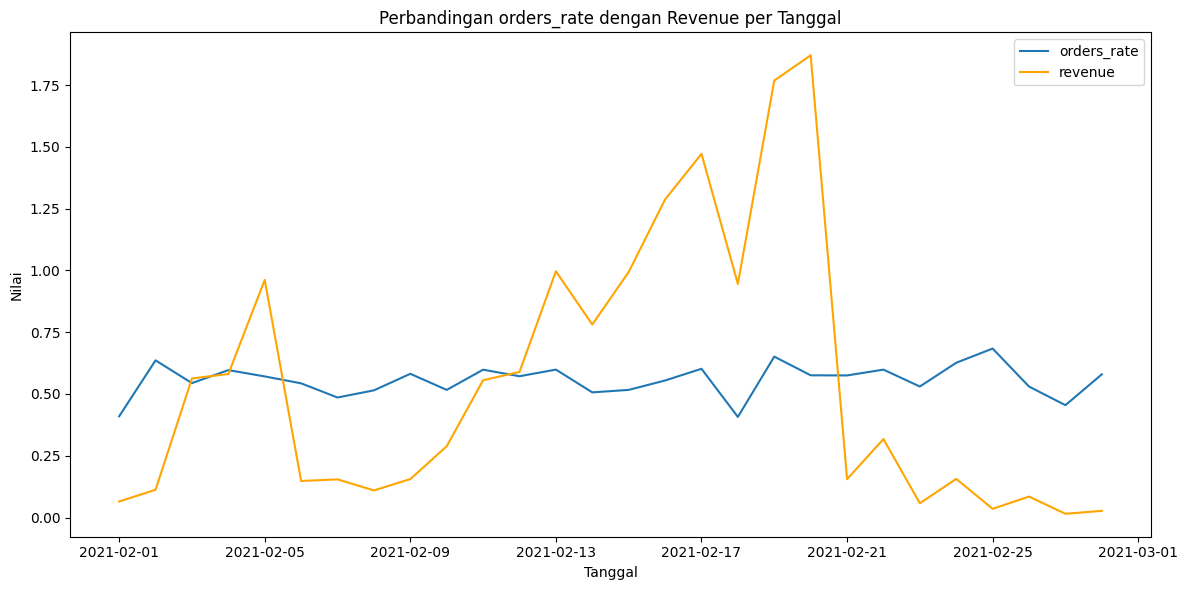

In [47]:
# Membandingkan tiap kolom di rate_col dengan sum revenue per tanggal
for col in rate_col:
    plt.figure(figsize=(12, 6))
    plt.plot(df_sum_per_date_scaled['c_date'], df_sum_per_date_scaled[col], label=col)
    plt.plot(df_sum_per_date_scaled['c_date'], df_sum_per_date_scaled['revenue'], label='revenue', color='orange')
    plt.xlabel('Tanggal')
    plt.ylabel('Nilai')
    plt.title(f'Perbandingan {col} dengan Revenue per Tanggal')
    plt.legend()
    plt.tight_layout()
    plt.show()

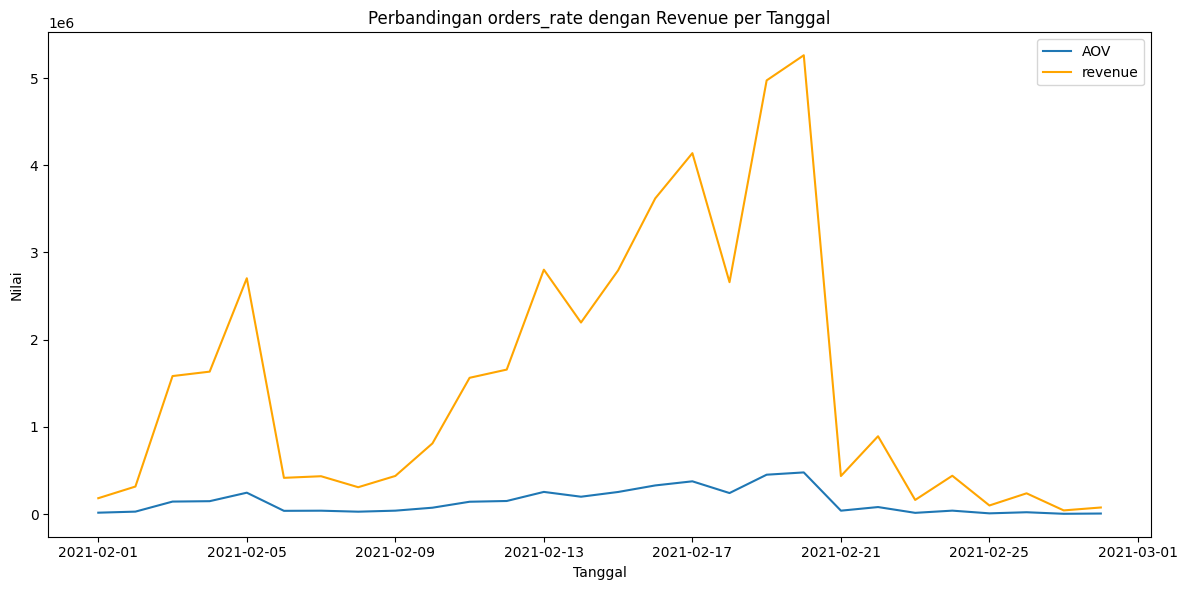

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(df_sum_per_date['c_date'], df_sum_per_date['AOV'], label='AOV')
plt.plot(df_sum_per_date['c_date'], df_sum_per_date['revenue'], label='revenue', color='orange')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.title(f'Perbandingan {col} dengan Revenue per Tanggal')
plt.legend()
plt.tight_layout()
plt.show()

## Cost Metric

In [37]:
### Overall CPC
cpc = df['mark_spent'].sum() / df['clicks'].sum()
print(f"CPC: {cpc}")

CPC: 10.197235265352164


In [ ]:
### Overall CPL
cpl = df['mark_spent'].sum() / df['leads'].sum()
print(f"CPL: {cpl}")

CPL: 466.4737159761509


In [ ]:
### overall CAC
cac = df['mark_spent'].sum() / df['orders'].sum()
print(f"CAC: {cac}")

CAC: 3803.416613204028


In [42]:
cpl_by_date = df.groupby('campaign_name').apply(
    lambda x: pd.Series({
        'CPL': x['mark_spent'].sum() / x['leads'].sum(),
        'CPC': x['mark_spent'].sum() / x['clicks'].sum(),
        'CAC': x['mark_spent'].sum() / x['orders'].sum(),
        'ROMI': (x['revenue'].sum() - x['mark_spent'].sum()) / x['mark_spent'].sum()
        
    })
).reset_index()
cpl_by_date.sort_values(by='ROMI', ascending=False, inplace=True)
print(cpl_by_date)

           campaign_name          CPL        CPC          CAC      ROMI
10       youtube_blogger   408.613081   9.017356  2120.134018  2.773207
2   facebook_retargeting   526.613083   8.895848  2467.279815  1.014961
5             google_hot   654.663808  13.326212  4270.458221  0.838124
8        instagram_tier1   386.802963   9.502399  3384.270778  0.771397
7      instagram_blogger   606.074140  14.159827  3861.243245  0.367542
0         banner_partner   495.287689  11.968188  3209.881711  0.224062
3         facebook_tier1   725.542710  10.686773  5410.956709 -0.065651
4         facebook_tier2   556.937704  14.225015  6822.486875 -0.262164
6            google_wide   428.593347   9.418103  4132.360713 -0.336703
9        instagram_tier2   102.771713   2.090530  3406.242013 -0.371141
1           facebook_lal  1383.938837  22.013959  8986.187891 -0.886359


## All metric by type

In [43]:
all_mtric_by_cat = df.groupby('category').apply(
    lambda x: pd.Series({
        'total_revenue': x['revenue'].sum(),
        'CPL': x['mark_spent'].sum() / x['leads'].sum(),
        'CPC': x['mark_spent'].sum() / x['clicks'].sum(),
        'CAC': x['mark_spent'].sum() / x['orders'].sum(),
        'ROMI': (x['revenue'].sum() - x['mark_spent'].sum()) / x['mark_spent'].sum()
        
    })
).reset_index()
all_mtric_by_cat.sort_values(by='ROMI', ascending=False, inplace=True)
print(all_mtric_by_cat)

     category  total_revenue         CPL        CPC          CAC      ROMI
0  influencer     21119887.0  490.306634  11.074137  2755.575342  1.542940
1       media      6152960.0  495.287689  11.968188  3209.881711  0.224062
2      search      3705065.0  486.900249  10.484345  4179.227138  0.070704
3      social     11911454.0  439.666738   9.199681  5236.622736 -0.136757


C:\Users\User\AppData\Local\Temp\ipykernel_12888\660882351.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_mtric_by_cat['category'], y=all_mtric_by_cat[col], palette='viridis')
C:\Users\User\AppData\Local\Temp\ipykernel_12888\660882351.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_mtric_by_cat['category'], y=all_mtric_by_cat[col], palette='viridis')
C:\Users\User\AppData\Local\Temp\ipykernel_12888\660882351.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_mtric_by_cat['category'], y=all_mtric_by_cat[col], palet

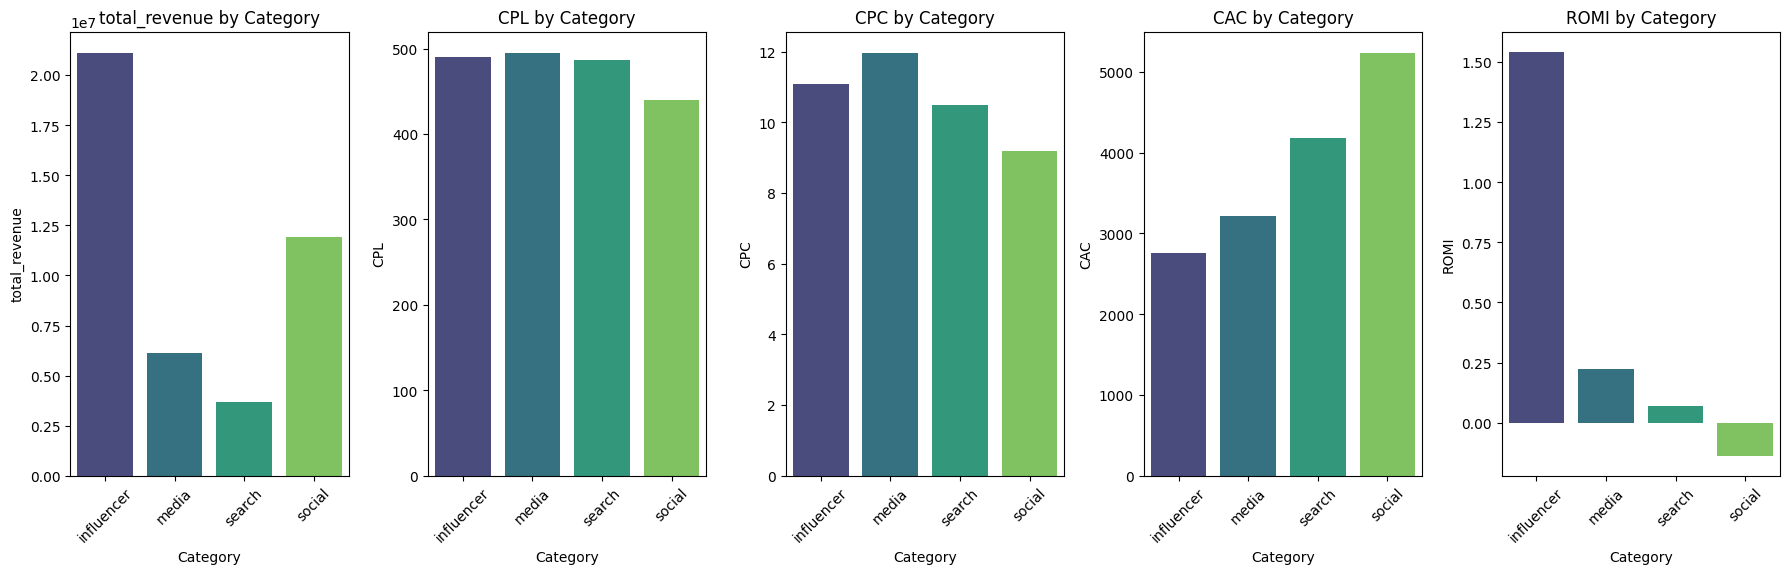

In [44]:
# Bar chart untuk semua kolom dari all_mtric_by_cat dalam satu figure (satu chart per kolom)

cols_to_plot = ['total_revenue', 'CPL', 'CPC', 'CAC', 'ROMI']

plt.figure(figsize=(18, 6))
for i, col in enumerate(cols_to_plot):
    plt.subplot(1, len(cols_to_plot), i+1)
    sns.barplot(x=all_mtric_by_cat['category'], y=all_mtric_by_cat[col], palette='viridis')
    plt.title(f'{col} by Category')
    plt.xlabel('Category')
    plt.ylabel(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Dari perbandingan diatas Influencer bisa menjadi Model campaign yang bisa dialndalkan karena merupakan Kategori yang paling efektif, dengan cac yang paling rendah bisa mendapatkan revenue dan ROMI tertinggi.

Sedangkan social bisa dihilangkan atau diimprove karena menghasilkan ROMI yang negatif, yang berarti bukannya mendapatkan untuk malah rugi.